In [6]:
%matplotlib inline

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor


import sqlite3
connection = sqlite3.connect("./database/final.db")

In [2]:
oneHotEncoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
labelEncoder = LabelEncoder()

For obtaining the best results possible, we tried many different models. More specifically, we developed four distinct models:
* **The most basic model possible**
* **The team performance model**
* **The model based on the players’ performance prediction**
* **The best model**

Also, it's important to note, that in the model testing phase, it is useful to gather some metrics relative to the way it is working and the quality of its predictions.

With this in mind, for each model, we considered relevant metrics:
 - Accuracy
 - Precision
 - Recall
 - F1
 - Confusion Matrix
 - ROC
 - AUC

## 1º Try - The most basic model possible

This was the first model we created, and it served as a foundation for testing various machine learning algorithms. The features we chose for this model were:
* **team ID** 
* **player ID**
* **year**
* **playoff** (whether the team made the playoffs or not)

The data was divided into training (the first nine years of data) and test sets (the tenth year of data). Also, due to the inclusion of the player IDs, we aren’t determining which teams go to the playoffs, but which players go instead. This type of division into training and test sets was also used in the next models.


In [25]:
query = "select teams.tmID as tmID, playerID, teams.year as year, playoff from players_teams join teams \
on teams.tmID = players_teams.tmID and teams.year = players_teams.year order by teams.year, teams.name ;"

df = pd.read_sql(query, connection)
categorical_columns = ["tmID", "playerID"]

for col in categorical_columns:
    df[col] = labelEncoder.fit_transform(df[col].astype('str'))
    
# replace 'Y' and 'N' with 1 and 0 in the playoff column
df["playoff"] = df["playoff"].replace("Y", 1)
df["playoff"] = df["playoff"].replace("N", 0)
    
print(df.head())
    
# split the data into train and test

train_df = df[df["year"] < 10]

train_inputs = train_df.iloc[:, :-1].values
train_labels = train_df.iloc[:, -1].values
    
test_df = df[df["year"] == 10]

print(test_df)

test_inputs = test_df.iloc[:, :-1].values
test_labels = test_df.iloc[:, -1].values


   tmID  playerID  year  playoff
0     1        34     1        0
1     1        59     1        0
2     1       138     1        0
3     1       139     1        0
4     1       208     1        0
      tmID  playerID  year  playoff
1711     0        85    10        1
1712     0       122    10        1
1713     0       213    10        1
1714     0       262    10        1
1715     0       269    10        1
...    ...       ...   ...      ...
1871    19       266    10        1
1872    19       298    10        1
1873    19       320    10        1
1874    19       339    10        1
1875    19       411    10        1

[165 rows x 4 columns]


For this model, we decided to test it with the following four ML algorithms:
* **Decision Tree Classifier**
* **Logistic Regression**
* **Naive Bayes**
* **Support Vector Machine**



### Decision Tree Classifier

Accuracy: 0.5454545454545454
Precision: 0.6310679611650486
Recall: 0.6372549019607843
F1: 0.6341463414634146
Confusion matrix:
[[25 38]
 [37 65]]


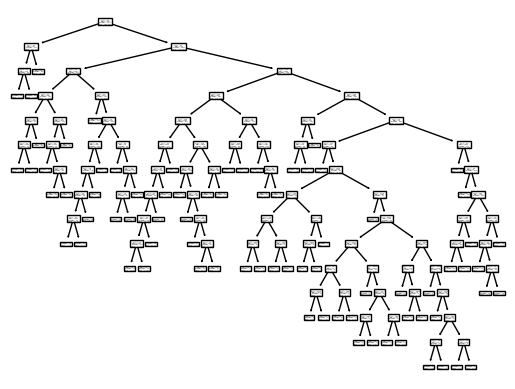

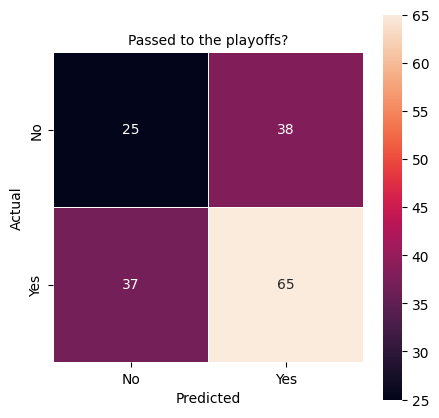

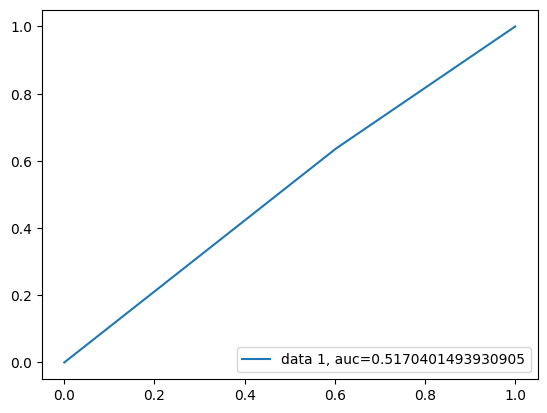

In [26]:
clf = DecisionTreeClassifier(random_state=1)
clf.fit(train_inputs,train_labels)


tree.plot_tree(clf)

# metrics for the decision tree
y_pred = clf.predict(test_inputs)
print("Accuracy:",metrics.accuracy_score(test_labels, y_pred))
print("Precision:",metrics.precision_score(test_labels, y_pred))
print("Recall:",metrics.recall_score(test_labels, y_pred))
print("F1:",metrics.f1_score(test_labels, y_pred))

# confusion matrix
confusion = confusion_matrix(test_labels, y_pred)
print(f"Confusion matrix:\n{confusion}")

#plot confusion matrix
plt.figure(figsize=(5,5))
sb.heatmap(confusion, annot=True, fmt="g", linewidths=.5, square = True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Passed to the playoffs?'
plt.title(all_sample_title, size = 10)
plt.show()

# roc curve
y_pred_proba = clf.predict_proba(test_inputs)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_labels,  y_pred_proba)
auc = metrics.roc_auc_score(test_labels, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Logistic Regression 

Accuracy: 0.62
Precision: 0.62
Recall: 1.00
F1: 0.76


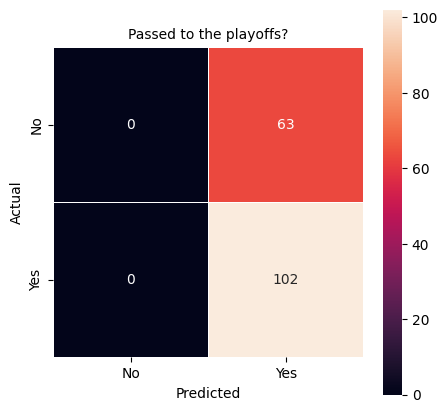

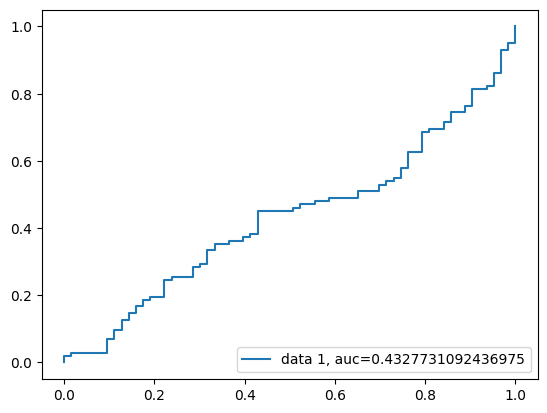

In [27]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(train_inputs, train_labels)

y_pred = logreg.predict(test_inputs)

# metrics for the logistic regression
accuracy = accuracy_score(test_labels, y_pred)
print(f"Accuracy: {accuracy:.2f}")
precision = metrics.precision_score(test_labels, y_pred)
print(f"Precision: {precision:.2f}")
recall = metrics.recall_score(test_labels, y_pred)
print(f"Recall: {recall:.2f}")
f1 = metrics.f1_score(test_labels, y_pred)
print(f"F1: {f1:.2f}")

# plot the confusion matrix
confusion = confusion_matrix(test_labels, y_pred)

plt.figure(figsize=(5,5))
sb.heatmap(confusion, annot=True, fmt="g", linewidths=.5, square = True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Passed to the playoffs?'

plt.title(all_sample_title, size = 10)
plt.show()

# roc curve
y_pred_proba = logreg.predict_proba(test_inputs)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_labels,  y_pred_proba)
auc = metrics.roc_auc_score(test_labels, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Naive Bayes

Accuracy: 0.62
Precision: 0.62
Recall: 1.00
F1: 0.76


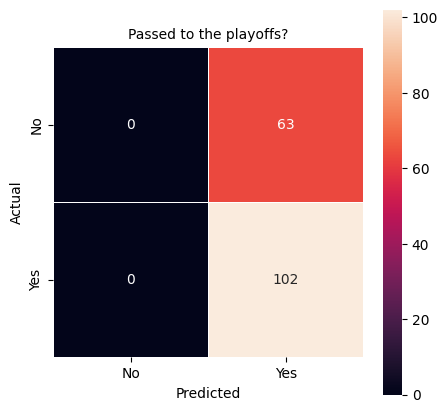

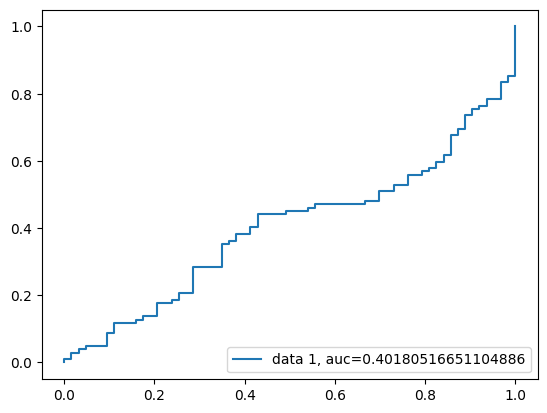

In [28]:
# Naive Bayes
gnb = GaussianNB()
gnb.fit(train_inputs, train_labels)

y_pred = gnb.predict(test_inputs)

# metrics for the naive bayes
accuracy = accuracy_score(test_labels, y_pred)
print(f"Accuracy: {accuracy:.2f}")
precision = metrics.precision_score(test_labels, y_pred)
print(f"Precision: {precision:.2f}")
recall = metrics.recall_score(test_labels, y_pred)
print(f"Recall: {recall:.2f}")
f1 = metrics.f1_score(test_labels, y_pred)
print(f"F1: {f1:.2f}")

# plot the confusion matrix
confusion = confusion_matrix(test_labels, y_pred)

plt.figure(figsize=(5,5))
sb.heatmap(confusion, annot=True, fmt="g", linewidths=.5, square = True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Passed to the playoffs?'

plt.title(all_sample_title, size = 10)
plt.show()

# roc curve
y_pred_proba = gnb.predict_proba(test_inputs)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_labels,  y_pred_proba)
auc = metrics.roc_auc_score(test_labels, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Support Vector Machine (SVM)

Accuracy: 0.62
Precision: 0.62
Recall: 1.00
F1: 0.76


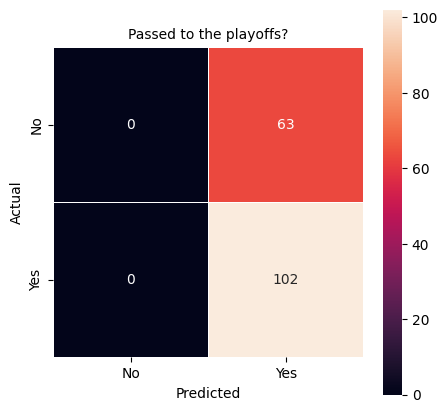

In [29]:
# SVM
svm = SVC(kernel='linear')
svm.fit(train_inputs, train_labels)

y_pred = svm.predict(test_inputs)

# metrics for the SVM
accuracy = accuracy_score(test_labels, y_pred)
print(f"Accuracy: {accuracy:.2f}")
precision = metrics.precision_score(test_labels, y_pred)
print(f"Precision: {precision:.2f}")
recall = metrics.recall_score(test_labels, y_pred)
print(f"Recall: {recall:.2f}")
f1 = metrics.f1_score(test_labels, y_pred)
print(f"F1: {f1:.2f}")

# plot the confusion matrix
confusion = confusion_matrix(test_labels, y_pred)

plt.figure(figsize=(5,5))
sb.heatmap(confusion, annot=True, fmt="g", linewidths=.5, square = True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Passed to the playoffs?'

plt.title(all_sample_title, size = 10)
plt.show()

The results of the four algorithms chosen show that, on one hand, the obtained values aren't great, which is explained by the small number of attributes chosen. 

This model, on the other hand, doesn't tell us anything, because it doesn't determine which teams make the playoffs. This was only used as a base for the next models.

## 2º Try - Team Performance in Consideration

To improve the quality of our predictions in comparison with the previous model we decided to train our model based on the teams average statistics per player from the previous year. 

With this approach we solve the problem of having predictions on the players instead of on the teams.

We attempted to focus on a key aspect of this project in this second model: **a team is made up of players**. 

As a result, in addition to the team ID, year, and playoff attributes, we included:
* **the average performance of each  teams’ players, in each year**
* **the yearly average heights and weights of each team**
* **the win and loss ratio** 
* **the number of player awards** 
* **the number of coach awards**
* **if a team reached the semifinals and the finals**

It also should be noted that, once again, the train-test split done in this model was the same as the previous one.

In [30]:
## create an empty dataframe without any column names, indices or data
df = pd.DataFrame()

## obtain the team IDS and year
team_ids = pd.read_sql("select tmID, year from teams", connection)

## iterate through each team and year
for index, row in team_ids.iterrows():
    ## obtain the team ID and year for each row
    team_id = row['tmID']
    year = row['year']
    
    if(year == 1):
        continue
    
    query = "select tmID, year + 1 as year, avg(oRebounds), avg(dRebounds), avg(rebounds), avg(assists), avg(steals), avg(blocks), \
        avg(turnovers), avg(PF), avg(fgAttempted), avg(fgMade), avg(ftAttempted), avg(ftMade), avg(threeAttempted), avg(threeMade) \
        from players_teams where tmID = '" + team_id + "' and year = " + str(year - 1) + ";"
        
    ## obtain the average stats for each team
    team_stats = pd.read_sql(query, connection)
    
    query = "select avg(weight), avg(height) from players_teams join players on players.bioID = players_teams.playerID \
        where tmID = '" + team_id + "' and year = " + str(year) + ";"
        
    ## obtain the average weight and height for each team
    team_weight_height = pd.read_sql(query, connection)
    
    ## add the average weight and height to the team stats
    team_stats['weight'] = team_weight_height['avg(weight)']
    team_stats['height'] = team_weight_height['avg(height)']
    
    # transform the NaN values to 0
    team_stats = team_stats.fillna(0)
    
    # include in the query the win and loss ratio
    query = "select tmID, year, won, lost, GP from teams where tmID = '" + team_id + "' and year = " + str(year - 1) + ";"
    
    team_win_loss = pd.read_sql(query, connection)
    
    # obtain the win and loss ratio
    win_ratio = team_win_loss['won'] / team_win_loss['GP']
    loss_ratio = team_win_loss['lost'] / team_win_loss['GP']
    
    # add the win and loss ratio to the team stats
    team_stats['win_ratio'] = win_ratio
    team_stats['loss_ratio'] = loss_ratio
    
    query = "select count(pt.playerID) as num_player_awards from players_teams pt join awards_players ap on pt.playerID = ap.playerID \
        where pt.year = ap.year and pt.tmID = '" + team_id + "' and pt.year < " + str(year) + " group by pt.tmID, ap.year;"
        
    team_awards = pd.read_sql(query, connection)
    
    # add the number of player awards to the team stats
    team_stats['num_player_awards'] = team_awards['num_player_awards']
    
    # transform the NaN values to 0
    team_stats = team_stats.fillna(0)
    
    # obtain the number of coach awards
    query = "select count(coachID) as num_coach_awards from coaches join awards_players ap on coaches.coachID = ap.playerID \
        where coaches.year = ap.year and coaches.tmID = '" + team_id + "' and coaches.year < " + str(year) + " group by coaches.tmID, ap.year;"
        
    team_coach_awards = pd.read_sql(query, connection)
    
    # add the number of coach awards to the team stats
    team_stats['num_coach_awards'] = team_coach_awards['num_coach_awards']
    
    # transform the NaN values to 0
    team_stats = team_stats.fillna(0)
        
    query = "select tmID, year from teams where semis <> '' and tmID = '" + team_id + "' and year = " + str(year - 1) + ";"
    semis = pd.read_sql(query, connection)
    
    # team reached semis
    if semis.empty:
        team_stats['semis'] = 0
    else:
        team_stats['semis'] = 1
        
    query = "select tmID, year from teams where finals <> '' and tmID = '" + team_id + "' and year = " + str(year - 1) + ";"
    finals = pd.read_sql(query, connection)
    
    # team reached finals
    if finals.empty:
        team_stats['finals'] = 0
    else:
        team_stats['finals'] = 1
        
    query = "select playoff from teams where tmID = '" + team_id + "' and year = " + str(year) + ";"
    playoff = pd.read_sql(query, connection)
    
    # check if it's Y or N
    if playoff['playoff'][0] == 'Y':
        team_stats['playoff'] = 1
    else:
        team_stats['playoff'] = 0
        
    
    # append the stats to the dataframe
    df = df._append(team_stats, ignore_index=True)
    
    if(year == 10):
        print(team_stats)

  tmID  year  avg(oRebounds)  avg(dRebounds)  avg(rebounds)  avg(assists)   
0  ATL    10       21.214286       46.428571      67.642857     34.428571  \

   avg(steals)  avg(blocks)  avg(turnovers)    avg(PF)  ...  avg(threeMade)   
0    20.142857     8.214286       35.642857  50.357143  ...       14.428571  \

       weight     height  win_ratio  loss_ratio  num_player_awards   
0  159.076923  72.538462   0.117647    0.882353                  0  \

   num_coach_awards  semis  finals  playoff  
0                 0      0       0        1  

[1 rows x 25 columns]
  tmID  year  avg(oRebounds)  avg(dRebounds)  avg(rebounds)  avg(assists)   
0  CHI    10       27.461538       59.230769      86.692308     42.153846  \

   avg(steals)  avg(blocks)  avg(turnovers)    avg(PF)  ...  avg(threeMade)   
0    20.692308    11.461538       37.307692  49.153846  ...        8.461538  \

       weight     height  win_ratio  loss_ratio  num_player_awards   
0  164.333333  71.916667   0.352941    0.64705

We also needed to encode the categorical columns, in order to make them work in the algorithms we chose.

In [31]:
# encode the categorical columns

team_pairs = []
team_names = df["tmID"].values
df["tmID"] = labelEncoder.fit_transform(df["tmID"].astype('str'))   

team_pairs = set(zip(team_names, df["tmID"].values))

print(team_pairs)   
        
# remove the rows that have year = 10
train_df = df[df.year < 10]

# remove the rows that have year <> 10
test_df = df[df.year == 10]

# create the training labels and inputs
train_inputs = train_df.iloc[:, :-1].values
train_labels = train_df.iloc[:, -1].values

# create the testing labels and inputs
test_inputs = test_df.iloc[:, :-1].values
test_labels = test_df.iloc[:, -1].values

{('DET', 6), ('SAC', 16), ('ATL', 1), ('SAS', 17), ('MIN', 11), ('LAS', 9), ('IND', 8), ('PHO', 14), ('HOU', 7), ('ORL', 13), ('CHI', 3), ('POR', 15), ('UTA', 19), ('CLE', 4), ('CON', 5), ('SEA', 18), (0, 0), ('MIA', 10), ('WAS', 20), ('NYL', 12), ('CHA', 2)}


In this second model, we used the following four ML algorithms:
* **Decision Tree Classifier**
* **Logistic Regression**
* **Naive Bayes**
* **Support Vector Machine**

Also, in the algorithms, we determined the probabilities of each team making into the playoffs. 

### Decision Tree Classifier

Accuracy: 0.38461538461538464
Precision: 0.5
Recall: 0.25
F1: 0.3333333333333333
Confusion matrix:
[[3 2]
 [6 2]]


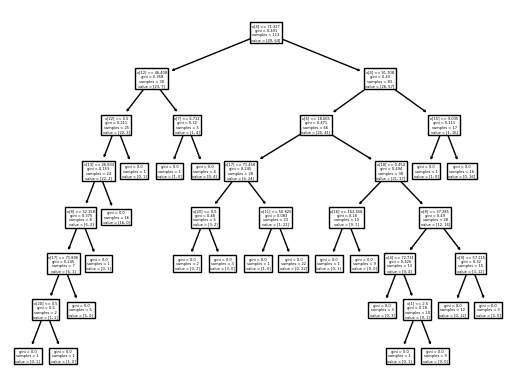

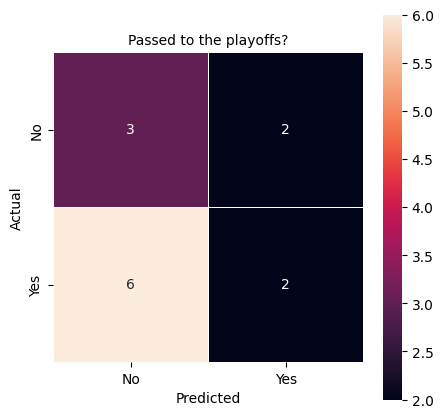

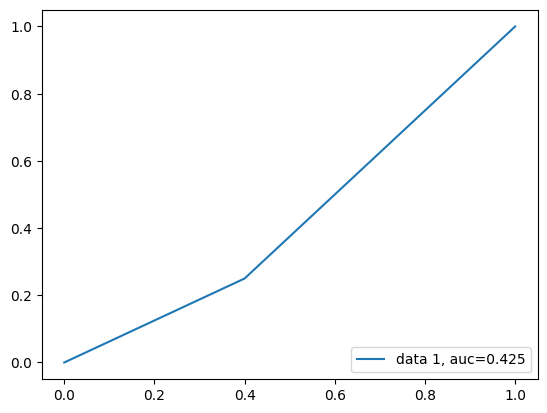

In [32]:
clf = DecisionTreeClassifier(random_state=1)
clf.fit(train_inputs,train_labels)


tree.plot_tree(clf)

# metrics for the decision tree
y_pred = clf.predict(test_inputs)
print("Accuracy:",metrics.accuracy_score(test_labels, y_pred))
print("Precision:",metrics.precision_score(test_labels, y_pred))
print("Recall:",metrics.recall_score(test_labels, y_pred))
print("F1:",metrics.f1_score(test_labels, y_pred))

# confusion matrix
confusion = confusion_matrix(test_labels, y_pred)
print(f"Confusion matrix:\n{confusion}")

#plot confusion matrix
plt.figure(figsize=(5,5))
sb.heatmap(confusion, annot=True, fmt="g", linewidths=.5, square = True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Passed to the playoffs?'
plt.title(all_sample_title, size = 10)
plt.show()

# roc curve
y_pred_proba = clf.predict_proba(test_inputs)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_labels,  y_pred_proba)
auc = metrics.roc_auc_score(test_labels, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [33]:
query = "select tmId, confID from teams where year = 10;"
teams_conf_ids = pd.read_sql(query, connection)

west_teams = teams_conf_ids[teams_conf_ids["confID"] == "WE"]
east_teams = teams_conf_ids[teams_conf_ids["confID"] == "EA"]

# print the probabilities for each class
probs = clf.predict_proba(test_inputs)
probs_west = []
probs_east = []

for i in range(len(probs)):
    team_id = test_df["tmID"].values[i]
    
    # obtain the team name from the team_pairs
    team_name = [x[0] for x in team_pairs if x[1] == team_id]
    
    if team_name in west_teams["tmID"].values:
        probs_west.append((team_name[0], probs[i][1]))
        
    if team_name in east_teams["tmID"].values:
        probs_east.append((team_name[0], probs[i][1]))
    
    # print(f"{team_name[0]}: {probs[i][1]}")

probs_west = sorted(probs_west, key=lambda x: x[1], reverse=True)
probs_east = sorted(probs_east, key=lambda x: x[1], reverse=True)

print(probs_west)
print(probs_east)

[('PHO', 1.0), ('LAS', 0.0), ('MIN', 0.0), ('SAC', 0.0), ('SAS', 0.0), ('SEA', 0.0)]
[('CON', 1.0), ('DET', 1.0), ('NYL', 1.0), ('ATL', 0.0), ('CHI', 0.0), ('IND', 0.0), ('WAS', 0.0)]


### Logistic Regression

Accuracy: 0.54
Precision: 0.60
Recall: 0.75
F1: 0.67


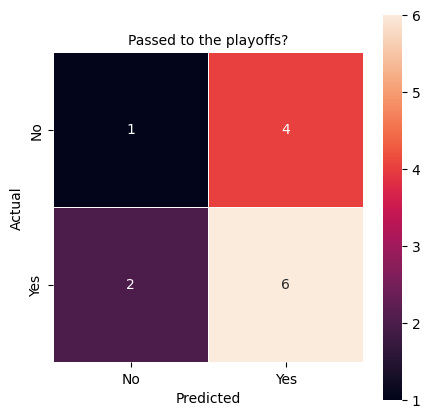

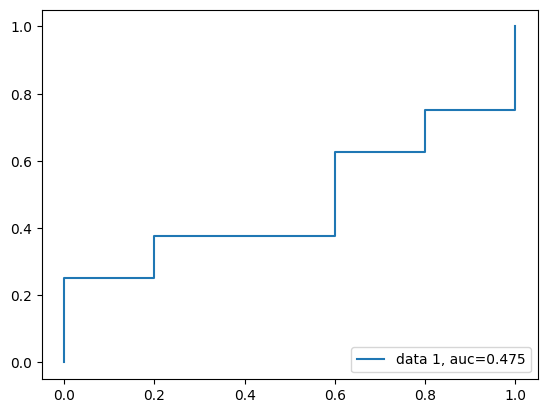

In [34]:
logreg = LogisticRegression(max_iter=2000)
logreg.fit(train_inputs, train_labels)

y_pred = logreg.predict(test_inputs)

# metrics for the logistic regression
accuracy = accuracy_score(test_labels, y_pred)
print(f"Accuracy: {accuracy:.2f}")
precision = metrics.precision_score(test_labels, y_pred)
print(f"Precision: {precision:.2f}")
recall = metrics.recall_score(test_labels, y_pred)
print(f"Recall: {recall:.2f}")
f1 = metrics.f1_score(test_labels, y_pred)
print(f"F1: {f1:.2f}")

# plot the confusion matrix
confusion = confusion_matrix(test_labels, y_pred)

plt.figure(figsize=(5,5))
sb.heatmap(confusion, annot=True, fmt="g", linewidths=.5, square = True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Passed to the playoffs?'

plt.title(all_sample_title, size = 10)
plt.show()

# roc curve
y_pred_proba = logreg.predict_proba(test_inputs)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_labels,  y_pred_proba)
auc = metrics.roc_auc_score(test_labels, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [35]:
query = "select tmId, confID from teams where year = 10;"
teams_conf_ids = pd.read_sql(query, connection)

# print(teams_conf_ids)

west_teams = teams_conf_ids[teams_conf_ids["confID"] == "WE"]
east_teams = teams_conf_ids[teams_conf_ids["confID"] == "EA"]

# print(west_teams)
# print(east_teams)

# print the probabilities for each class
probs = logreg.predict_proba(test_inputs)
probs_west = []
probs_east = []

for i in range(len(probs)):
    team_id = test_df["tmID"].values[i]
    
    # obtain the team name from the team_pairs
    team_name = [x[0] for x in team_pairs if x[1] == team_id]
    
    if team_name in west_teams["tmID"].values:
        probs_west.append((team_name[0], probs[i][1]))
        
    if team_name in east_teams["tmID"].values:
        probs_east.append((team_name[0], probs[i][1]))
    
    # print(f"{team_name[0]}: {probs[i][1]}")

probs_west = sorted(probs_west, key=lambda x: x[1], reverse=True)
probs_east = sorted(probs_east, key=lambda x: x[1], reverse=True)

print(probs_west)
print(probs_east)

[('LAS', 0.9577890544175538), ('SEA', 0.9065734133617803), ('SAC', 0.710125975541044), ('SAS', 0.6427022525602992), ('PHO', 0.5035146741136152), ('MIN', 0.47501009490261903)]
[('DET', 0.963599864871183), ('CON', 0.9286181570961991), ('NYL', 0.8682759016395013), ('WAS', 0.6680093241349571), ('CHI', 0.638343176374923), ('IND', 0.4675063893185421), ('ATL', 0.021829215737276128)]


### Naive Bayes

Accuracy: 0.46
Precision: 0.55
Recall: 0.75
F1: 0.63


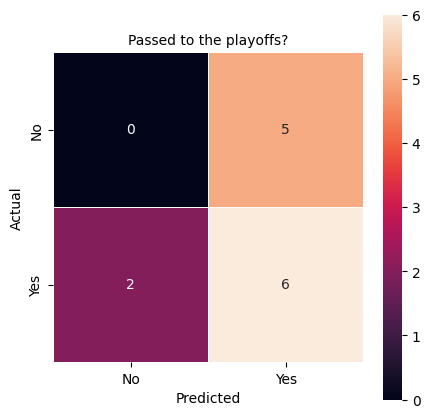

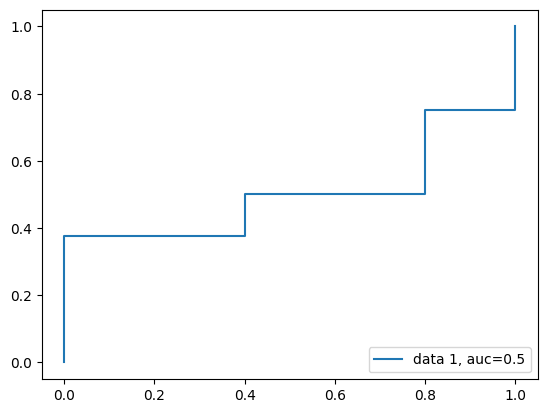

In [36]:
# Naive Bayes
gnb = GaussianNB()
gnb.fit(train_inputs, train_labels)

y_pred = gnb.predict(test_inputs)

# metrics for the naive bayes
accuracy = accuracy_score(test_labels, y_pred)
print(f"Accuracy: {accuracy:.2f}")
precision = metrics.precision_score(test_labels, y_pred)
print(f"Precision: {precision:.2f}")
recall = metrics.recall_score(test_labels, y_pred)
print(f"Recall: {recall:.2f}")
f1 = metrics.f1_score(test_labels, y_pred)
print(f"F1: {f1:.2f}")

# plot the confusion matrix
confusion = confusion_matrix(test_labels, y_pred)

plt.figure(figsize=(5,5))
sb.heatmap(confusion, annot=True, fmt="g", linewidths=.5, square = True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Passed to the playoffs?'

plt.title(all_sample_title, size = 10)
plt.show()

# roc curve
y_pred_proba = gnb.predict_proba(test_inputs)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_labels,  y_pred_proba)
auc = metrics.roc_auc_score(test_labels, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [37]:
query = "select tmId, confID from teams where year = 10;"
teams_conf_ids = pd.read_sql(query, connection)

# print(teams_conf_ids)

west_teams = teams_conf_ids[teams_conf_ids["confID"] == "WE"]
east_teams = teams_conf_ids[teams_conf_ids["confID"] == "EA"]

# print(west_teams)
# print(east_teams)

# print the probabilities for each class
probs = gnb.predict_proba(test_inputs)
probs_west = []
probs_east = []

for i in range(len(probs)):
    team_id = test_df["tmID"].values[i]
    
    # obtain the team name from the team_pairs
    team_name = [x[0] for x in team_pairs if x[1] == team_id]
    
    if team_name in west_teams["tmID"].values:
        probs_west.append((team_name[0], probs[i][1]))
        
    if team_name in east_teams["tmID"].values:
        probs_east.append((team_name[0], probs[i][1]))
    
    # print(f"{team_name[0]}: {probs[i][1]}")

probs_west = sorted(probs_west, key=lambda x: x[1], reverse=True)
probs_east = sorted(probs_east, key=lambda x: x[1], reverse=True)

print(probs_west)
print(probs_east)

[('SAS', 0.9999999993595807), ('LAS', 0.999995735114268), ('SEA', 0.9956688538005222), ('SAC', 0.9931958361577308), ('MIN', 0.9844763074179103), ('PHO', 0.9755779528715786)]
[('DET', 0.9999986883821284), ('NYL', 0.9999489778588376), ('CON', 0.9973707223795731), ('IND', 0.9663104884717482), ('CHI', 0.9624699351771552), ('WAS', 0.17918944528840774), ('ATL', 0.0651126709376749)]


### Support Vector Machines (SVM)

Accuracy: 0.54
Precision: 0.60
Recall: 0.75
F1: 0.67


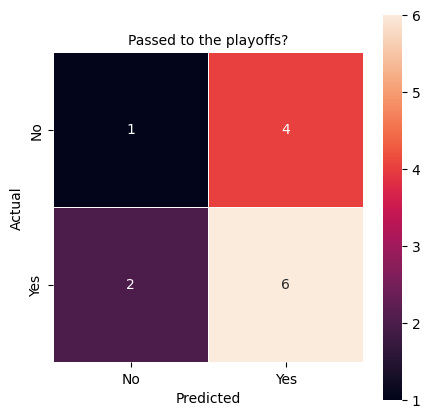

In [38]:
# SVM
svm = SVC(kernel='linear', probability=True)
svm.fit(train_inputs, train_labels)

y_pred = svm.predict(test_inputs)

# metrics for the SVM
accuracy = accuracy_score(test_labels, y_pred)
print(f"Accuracy: {accuracy:.2f}")
precision = metrics.precision_score(test_labels, y_pred)
print(f"Precision: {precision:.2f}")
recall = metrics.recall_score(test_labels, y_pred)
print(f"Recall: {recall:.2f}")
f1 = metrics.f1_score(test_labels, y_pred)
print(f"F1: {f1:.2f}")

# plot the confusion matrix
confusion = confusion_matrix(test_labels, y_pred)

plt.figure(figsize=(5,5))
sb.heatmap(confusion, annot=True, fmt="g", linewidths=.5, square = True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Passed to the playoffs?'

plt.title(all_sample_title, size = 10)
plt.show()


In [39]:
query = "select tmId, confID from teams where year = 10;"
teams_conf_ids = pd.read_sql(query, connection)

# print(teams_conf_ids)

west_teams = teams_conf_ids[teams_conf_ids["confID"] == "WE"]
east_teams = teams_conf_ids[teams_conf_ids["confID"] == "EA"]

# print(west_teams)
# print(east_teams)

# print the probabilities for each class
probs = svm.predict_proba(test_inputs)
probs_west = []
probs_east = []

for i in range(len(probs)):
    team_id = test_df["tmID"].values[i]
    
    # obtain the team name from the team_pairs
    team_name = [x[0] for x in team_pairs if x[1] == team_id]
    
    if team_name in west_teams["tmID"].values:
        probs_west.append((team_name[0], probs[i][1]))
        
    if team_name in east_teams["tmID"].values:
        probs_east.append((team_name[0], probs[i][1]))
    
    # print(f"{team_name[0]}: {probs[i][1]}")

probs_west = sorted(probs_west, key=lambda x: x[1], reverse=True)
probs_east = sorted(probs_east, key=lambda x: x[1], reverse=True)

print(probs_west)
print(probs_east)

[('LAS', 0.7403228666354108), ('SEA', 0.6567694569620802), ('SAS', 0.5961477238191676), ('PHO', 0.5795115469015342), ('SAC', 0.5608948667626998), ('MIN', 0.530566312264575)]
[('DET', 0.7268738479921495), ('CON', 0.6961112881791519), ('CHI', 0.6467645830404), ('NYL', 0.6420370363274973), ('WAS', 0.5942338760462021), ('IND', 0.5384343238502451), ('ATL', 0.4128800863295357)]


The most important takeaway from the model's results is that we can finally **predict which teams will qualify**. 

SVM, Logistic Regression and Naive Bayes were able to produce 6 True Positive classifications.

However, it is important to note that the model does not account for the following constraint: **only eight teams can make the playoffs, with four teams from the East conference and the other four from the West conference**. This can be seen in the results (for example, in the confusion matrices).

As it is stated in the presentation, the process to determine if a team passed, was centered around the probabilites calculated during the execution of each algorithm. Even if a team’s probability was bellow 50%, if it was in the top 4 of its conference, then it made the playoffs.

This model still has some limitations, namely the fact that it can't deal with a change in the teams composition and it also does not use information regarding coaches and awards.

# 3rd try - Based on the players perfomance

In a third approach we decided to try to predict the player performance considering their historical data and then consider the teams as a sum of all players.

Although the previous model produced some promising results, its poor execution could be due to the treatment of each team as an entity rather than a group of players. To counteract this, we shifted our focus to each player's performance.

With this in mind, the main idea behind this new model was to predict each player's performance in a year based on previous years' performance and then rank the teams based on the predicted performances. The four teams from each conference with the highest score qualify.

In [15]:
df = pd.read_sql("select * from players join players_teams on players.bioID = players_teams.playerID;", connection)

columns = ['bioID', 'pos', 'height', 'weight', 'college', 'collegeOther',
       'birthDate', 'year', 'stint', 'tmID', 'points', 'oRebounds', 'dRebounds', 'rebounds',
       'assists', 'steals', 'blocks', 'turnovers', 'PF', 'fgAttempted',
       'fgMade', 'ftAttempted', 'ftMade', 'threeAttempted', 'threeMade']

df = df[columns]

# get bioID and year from the dataframe
bioID = df["bioID"].values
year = df["year"].values

iterable = zip(bioID, year)

# iterate through the (bioID, year) pairs

for bioID, year in iterable:
        # get number of awards for the player in the team in the year
        query = "select count(award) as num_awards_player from awards_players ap join players_teams pt on ap.year = pt.year \
                and ap.playerID = pt.playerID where ap.playerID = '" + bioID + "' and ap.year <= " + str(year) + ";"
                
        player_awards = pd.read_sql(query, connection)
        
        # if(player_awards["num_awards_player"].values[0] > 0):
        #         print(bioID, year, player_awards)
                
        # add number of awards to the dataframe
        df.loc[(df["bioID"] == bioID) & (df["year"] == year), "num_awards_player"] = player_awards["num_awards_player"].values[0]
     
# extract year from birthDate
df["birthDate"] = pd.to_datetime(df["birthDate"])
df["birthDate"] = df["birthDate"].dt.year

player_ids_10 = df[df["year"] == 10]["bioID"].values

In [12]:
# transform categorical data
categorical_columns = ['bioID', 'pos', 'college', 'collegeOther', 'tmID']
for col in categorical_columns:
    df[col] = df[col].astype('category')
    
df = pd.get_dummies(df, columns=categorical_columns)

print(df['birthDate'])

# # get all rows from df where year = 10
test_data = df.loc[df["year"] == 10]

print("test_data")
print(test_data)

# # get all rows from df where year <> 10
train_data = df.loc[df["year"] < 10]


labels = ['points', 'oRebounds', 'dRebounds', 'rebounds', 'assists', 'steals',
       'blocks', 'turnovers', 'PF', 'fgAttempted', 'fgMade', 'ftAttempted',
       'ftMade', 'threeAttempted', 'threeMade']

inputs = []

for col in train_data.columns:
    if col not in labels:
        inputs.append(col)

print(inputs)

train_inputs = train_data[inputs].values
train_labels = train_data[labels].values

test_inputs = test_data[inputs].values
test_labels = test_data[labels].values

print("labels:")
print(train_labels)

# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_inputs = scaler.fit_transform(train_inputs)
test_inputs = scaler.transform(test_inputs)

0       1980
1       1980
2       1980
3       1980
4       1980
        ... 
1871    1977
1872    1976
1873    1986
1874    1980
1875    1986
Name: birthDate, Length: 1876, dtype: int32
test_data
      height  weight  birthDate  year  stint  points  oRebounds  dRebounds   
11      68.0     160       1986    10      0     272         27         37  \
36      75.0     211       1986    10      0     396         73        149   
49      72.0     172       1984    10      0       5          6         12   
54      72.0     179       1984    10      0     126          4         21   
69      68.0     125       1982    10      0       7          1          0   
...      ...     ...        ...   ...    ...     ...        ...        ...   
1854    73.0     183       1980    10      0      83         17         56   
1865    73.0     165       1983    10      0     600         69        146   
1867    74.0     166       1986    10      1      30          6          8   
1868    74.0     166   

We predicted each player statistic using a Neural Network and, considering there are multiple target variables, we extended the MLPRegressor with a MultiOutputRegressor to predict all the variables needed.

In [13]:
# train model
model = MultiOutputRegressor(MLPRegressor(hidden_layer_sizes=(100, 100, 100), 
    max_iter=100,batch_size=32, alpha=0.0001, solver='adam', verbose=10, random_state=21, tol=0.000000001))
model.fit(train_inputs, train_labels)

# test model
predictions = model.predict(test_inputs)
print(predictions)

Iteration 1, loss = 21732.20249789
Iteration 2, loss = 7963.91908709
Iteration 3, loss = 5019.83748846
Iteration 4, loss = 4007.61487391
Iteration 5, loss = 3600.42381734
Iteration 6, loss = 3497.08906626
Iteration 7, loss = 3334.93988554
Iteration 8, loss = 3250.37120489
Iteration 9, loss = 3164.57388229
Iteration 10, loss = 3110.02042553
Iteration 11, loss = 3064.13250614
Iteration 12, loss = 3032.15610027
Iteration 13, loss = 2965.86718647
Iteration 14, loss = 2885.98279766
Iteration 15, loss = 2873.83410021
Iteration 16, loss = 2794.76008519
Iteration 17, loss = 2763.57520464
Iteration 18, loss = 2747.33817481
Iteration 19, loss = 2728.62426413
Iteration 20, loss = 2651.62530402
Iteration 21, loss = 2639.98118188
Iteration 22, loss = 2583.41021701
Iteration 23, loss = 2545.38953033
Iteration 24, loss = 2498.29881541
Iteration 25, loss = 2409.84057366
Iteration 26, loss = 2373.36154702
Iteration 27, loss = 2392.62777220
Iteration 28, loss = 2306.85186858
Iteration 29, loss = 2299.28

C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 335.62016198
Iteration 2, loss = 153.57783334
Iteration 3, loss = 96.70695558
Iteration 4, loss = 82.67712357
Iteration 5, loss = 76.50449297
Iteration 6, loss = 74.02416362
Iteration 7, loss = 72.78066166
Iteration 8, loss = 70.42786068
Iteration 9, loss = 67.84373269
Iteration 10, loss = 67.13841543
Iteration 11, loss = 65.10225274
Iteration 12, loss = 66.31711998
Iteration 13, loss = 64.73010204
Iteration 14, loss = 63.56044456
Iteration 15, loss = 62.00858193
Iteration 16, loss = 60.11431197
Iteration 17, loss = 61.30522286
Iteration 18, loss = 59.51855406
Iteration 19, loss = 57.58899661
Iteration 20, loss = 56.51610785
Iteration 21, loss = 56.64666190
Iteration 22, loss = 55.59434608
Iteration 23, loss = 54.56350747
Iteration 24, loss = 54.16554005
Iteration 25, loss = 53.25566730
Iteration 26, loss = 51.39312090
Iteration 27, loss = 53.42945587
Iteration 28, loss = 51.79666193
Iteration 29, loss = 51.09701380
Iteration 30, loss = 50.85535116
Iteration 31, los

C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1664.47691790
Iteration 2, loss = 665.99759263
Iteration 3, loss = 406.72832613
Iteration 4, loss = 341.38184107
Iteration 5, loss = 317.00898601
Iteration 6, loss = 309.92476208
Iteration 7, loss = 299.62637722
Iteration 8, loss = 290.40835153
Iteration 9, loss = 283.97920941
Iteration 10, loss = 281.12476741
Iteration 11, loss = 271.10918104
Iteration 12, loss = 266.24346259
Iteration 13, loss = 266.17941268
Iteration 14, loss = 258.64260245
Iteration 15, loss = 255.81373750
Iteration 16, loss = 246.47539635
Iteration 17, loss = 243.97223350
Iteration 18, loss = 243.56893179
Iteration 19, loss = 236.52528495
Iteration 20, loss = 233.72394167
Iteration 21, loss = 231.35481255
Iteration 22, loss = 229.68788996
Iteration 23, loss = 226.29971428
Iteration 24, loss = 218.01605891
Iteration 25, loss = 215.18014006
Iteration 26, loss = 214.22513852
Iteration 27, loss = 209.89379371
Iteration 28, loss = 210.81470563
Iteration 29, loss = 205.66611431
Iteration 30, loss = 2

C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 3640.74569100
Iteration 2, loss = 1382.62037811
Iteration 3, loss = 851.70621564
Iteration 4, loss = 700.80741308
Iteration 5, loss = 644.03000526
Iteration 6, loss = 624.88535229
Iteration 7, loss = 608.66430749
Iteration 8, loss = 589.33002130
Iteration 9, loss = 570.99802364
Iteration 10, loss = 565.49028000
Iteration 11, loss = 547.79244892
Iteration 12, loss = 544.85020388
Iteration 13, loss = 541.69685573
Iteration 14, loss = 529.84737936
Iteration 15, loss = 521.37945810
Iteration 16, loss = 503.09874561
Iteration 17, loss = 502.73938507
Iteration 18, loss = 496.18229158
Iteration 19, loss = 484.69032557
Iteration 20, loss = 476.95905910
Iteration 21, loss = 473.94447106
Iteration 22, loss = 470.39448743
Iteration 23, loss = 462.46780055
Iteration 24, loss = 447.85305582
Iteration 25, loss = 440.47783213
Iteration 26, loss = 433.84767075
Iteration 27, loss = 434.56645212
Iteration 28, loss = 430.39150185
Iteration 29, loss = 421.18845662
Iteration 30, loss = 

C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 996.58427268
Iteration 2, loss = 451.16090351
Iteration 3, loss = 271.73761568
Iteration 4, loss = 216.07050289
Iteration 5, loss = 200.48475573
Iteration 6, loss = 194.12794861
Iteration 7, loss = 192.79402637
Iteration 8, loss = 188.94332770
Iteration 9, loss = 181.71640634
Iteration 10, loss = 175.31324987
Iteration 11, loss = 169.15495198
Iteration 12, loss = 170.49791192
Iteration 13, loss = 168.67526529
Iteration 14, loss = 163.64970554
Iteration 15, loss = 161.58929820
Iteration 16, loss = 158.31802811
Iteration 17, loss = 157.19284889
Iteration 18, loss = 151.73226544
Iteration 19, loss = 151.79355715
Iteration 20, loss = 148.05282080
Iteration 21, loss = 145.87478598
Iteration 22, loss = 140.60898636
Iteration 23, loss = 140.73317792
Iteration 24, loss = 138.31178421
Iteration 25, loss = 136.24442956
Iteration 26, loss = 130.74803726
Iteration 27, loss = 129.48747401
Iteration 28, loss = 128.85057075
Iteration 29, loss = 128.38458315
Iteration 30, loss = 12

C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 191.96483459
Iteration 2, loss = 87.22170811
Iteration 3, loss = 56.87260835
Iteration 4, loss = 49.82970697
Iteration 5, loss = 46.30802577
Iteration 6, loss = 44.56201733
Iteration 7, loss = 43.72524772
Iteration 8, loss = 42.81005311
Iteration 9, loss = 40.79156530
Iteration 10, loss = 40.54084689
Iteration 11, loss = 39.04882553
Iteration 12, loss = 38.59057586
Iteration 13, loss = 38.35670007
Iteration 14, loss = 37.58347735
Iteration 15, loss = 36.76586766
Iteration 16, loss = 35.72705169
Iteration 17, loss = 35.61283082
Iteration 18, loss = 35.56513890
Iteration 19, loss = 34.65057760
Iteration 20, loss = 33.53212308
Iteration 21, loss = 34.64085432
Iteration 22, loss = 32.96453995
Iteration 23, loss = 32.55543603
Iteration 24, loss = 32.45173954
Iteration 25, loss = 32.33803876
Iteration 26, loss = 31.35183058
Iteration 27, loss = 31.10222007
Iteration 28, loss = 30.31676824
Iteration 29, loss = 30.65965609
Iteration 30, loss = 30.62778585
Iteration 31, loss

C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 90.00011127
Iteration 2, loss = 41.20604908
Iteration 3, loss = 24.59668778
Iteration 4, loss = 22.27474717
Iteration 5, loss = 19.29314770
Iteration 6, loss = 18.41493919
Iteration 7, loss = 19.07532965
Iteration 8, loss = 17.31722944
Iteration 9, loss = 17.80138659
Iteration 10, loss = 16.72528110
Iteration 11, loss = 16.23914554
Iteration 12, loss = 15.72335819
Iteration 13, loss = 15.52039721
Iteration 14, loss = 15.32155025
Iteration 15, loss = 15.55473515
Iteration 16, loss = 14.48653766
Iteration 17, loss = 14.54453599
Iteration 18, loss = 13.85168870
Iteration 19, loss = 13.81569076
Iteration 20, loss = 13.91675450
Iteration 21, loss = 13.77147234
Iteration 22, loss = 13.79530510
Iteration 23, loss = 14.36454212
Iteration 24, loss = 13.29686895
Iteration 25, loss = 13.22529369
Iteration 26, loss = 12.98117352
Iteration 27, loss = 12.81410020
Iteration 28, loss = 12.66887327
Iteration 29, loss = 12.53114624
Iteration 30, loss = 12.52691267
Iteration 31, loss 

C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 581.90168079
Iteration 2, loss = 244.03431907
Iteration 3, loss = 162.39113144
Iteration 4, loss = 138.33359813
Iteration 5, loss = 129.40408608
Iteration 6, loss = 126.67957382
Iteration 7, loss = 124.65738383
Iteration 8, loss = 120.18782328
Iteration 9, loss = 117.75969778
Iteration 10, loss = 115.92786591
Iteration 11, loss = 112.44523472
Iteration 12, loss = 110.70347661
Iteration 13, loss = 108.71786747
Iteration 14, loss = 106.10299606
Iteration 15, loss = 105.37804756
Iteration 16, loss = 101.56130052
Iteration 17, loss = 99.58218640
Iteration 18, loss = 99.78851489
Iteration 19, loss = 98.81716276
Iteration 20, loss = 93.36048080
Iteration 21, loss = 92.87510316
Iteration 22, loss = 91.43011642
Iteration 23, loss = 91.73396468
Iteration 24, loss = 89.12446468
Iteration 25, loss = 85.55959707
Iteration 26, loss = 83.39204951
Iteration 27, loss = 83.41685756
Iteration 28, loss = 81.07149612
Iteration 29, loss = 80.85116968
Iteration 30, loss = 79.44136723
Ite

C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 988.50958294
Iteration 2, loss = 369.66024918
Iteration 3, loss = 239.71035886
Iteration 4, loss = 200.29366676
Iteration 5, loss = 187.21061065
Iteration 6, loss = 178.98378126
Iteration 7, loss = 173.92625580
Iteration 8, loss = 169.68098976
Iteration 9, loss = 164.83952830
Iteration 10, loss = 162.19126485
Iteration 11, loss = 158.87080991
Iteration 12, loss = 158.76618254
Iteration 13, loss = 157.17267093
Iteration 14, loss = 154.30789444
Iteration 15, loss = 150.79992794
Iteration 16, loss = 147.04777727
Iteration 17, loss = 143.72954979
Iteration 18, loss = 144.07992330
Iteration 19, loss = 140.91431036
Iteration 20, loss = 136.30615384
Iteration 21, loss = 136.19918486
Iteration 22, loss = 133.88278076
Iteration 23, loss = 130.34764476
Iteration 24, loss = 128.88873062
Iteration 25, loss = 128.41807178
Iteration 26, loss = 125.58888111
Iteration 27, loss = 124.65771749
Iteration 28, loss = 120.54179667
Iteration 29, loss = 121.13211117
Iteration 30, loss = 11

C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 14786.30315250
Iteration 2, loss = 5321.26174139
Iteration 3, loss = 3275.00902522
Iteration 4, loss = 2606.17106292
Iteration 5, loss = 2354.15624491
Iteration 6, loss = 2272.66970367
Iteration 7, loss = 2184.59840611
Iteration 8, loss = 2124.33592368
Iteration 9, loss = 2068.59451650
Iteration 10, loss = 2038.28532043
Iteration 11, loss = 1998.02071016
Iteration 12, loss = 1976.31757169
Iteration 13, loss = 1945.33570981
Iteration 14, loss = 1890.87850618
Iteration 15, loss = 1881.40293455
Iteration 16, loss = 1829.22331953
Iteration 17, loss = 1815.36522369
Iteration 18, loss = 1800.38576562
Iteration 19, loss = 1801.82338312
Iteration 20, loss = 1746.33355675
Iteration 21, loss = 1730.46387862
Iteration 22, loss = 1706.47937518
Iteration 23, loss = 1677.93484915
Iteration 24, loss = 1646.40187880
Iteration 25, loss = 1593.11958675
Iteration 26, loss = 1574.56132388
Iteration 27, loss = 1594.26655536
Iteration 28, loss = 1542.64532715
Iteration 29, loss = 1535.05

C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2462.99311903
Iteration 2, loss = 1003.05025320
Iteration 3, loss = 624.35162732
Iteration 4, loss = 517.85619176
Iteration 5, loss = 476.40381974
Iteration 6, loss = 464.08006178
Iteration 7, loss = 446.61848332
Iteration 8, loss = 434.72436573
Iteration 9, loss = 423.28960889
Iteration 10, loss = 417.40399695
Iteration 11, loss = 411.02167717
Iteration 12, loss = 402.17967287
Iteration 13, loss = 398.07246190
Iteration 14, loss = 383.77031760
Iteration 15, loss = 381.54871422
Iteration 16, loss = 368.28085632
Iteration 17, loss = 366.49555475
Iteration 18, loss = 364.02786409
Iteration 19, loss = 366.77741854
Iteration 20, loss = 348.45255600
Iteration 21, loss = 344.14507750
Iteration 22, loss = 344.43321970
Iteration 23, loss = 334.61683267
Iteration 24, loss = 332.56876409
Iteration 25, loss = 317.67708935
Iteration 26, loss = 313.90004185
Iteration 27, loss = 314.08705963
Iteration 28, loss = 303.06553783
Iteration 29, loss = 304.68067229
Iteration 30, loss = 

C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1521.15744488
Iteration 2, loss = 697.35722029
Iteration 3, loss = 431.88356274
Iteration 4, loss = 354.62652381
Iteration 5, loss = 324.75004924
Iteration 6, loss = 315.03283880
Iteration 7, loss = 305.56182414
Iteration 8, loss = 293.99458561
Iteration 9, loss = 285.78959048
Iteration 10, loss = 282.88366472
Iteration 11, loss = 279.12824647
Iteration 12, loss = 279.01357879
Iteration 13, loss = 271.59684213
Iteration 14, loss = 265.27269132
Iteration 15, loss = 262.99917708
Iteration 16, loss = 255.40899564
Iteration 17, loss = 251.11821141
Iteration 18, loss = 250.57103180
Iteration 19, loss = 249.33335672
Iteration 20, loss = 241.00572921
Iteration 21, loss = 239.97649039
Iteration 22, loss = 241.78215659
Iteration 23, loss = 239.35126310
Iteration 24, loss = 233.73413274
Iteration 25, loss = 226.38006063
Iteration 26, loss = 223.00005391
Iteration 27, loss = 224.92893875
Iteration 28, loss = 222.00034573
Iteration 29, loss = 216.36385235
Iteration 30, loss = 2

C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 878.44030208
Iteration 2, loss = 422.31104450
Iteration 3, loss = 265.01422484
Iteration 4, loss = 222.03604749
Iteration 5, loss = 203.88197500
Iteration 6, loss = 199.28524464
Iteration 7, loss = 193.03752414
Iteration 8, loss = 187.03046159
Iteration 9, loss = 182.56007247
Iteration 10, loss = 180.28960962
Iteration 11, loss = 176.88073484
Iteration 12, loss = 177.18069131
Iteration 13, loss = 173.42148221
Iteration 14, loss = 168.16087925
Iteration 15, loss = 169.33222043
Iteration 16, loss = 163.46316273
Iteration 17, loss = 160.45048614
Iteration 18, loss = 160.91635329
Iteration 19, loss = 159.69431589
Iteration 20, loss = 154.18465176
Iteration 21, loss = 155.61264621
Iteration 22, loss = 156.67487322
Iteration 23, loss = 154.43189315
Iteration 24, loss = 150.47220484
Iteration 25, loss = 144.93165071
Iteration 26, loss = 144.57141418
Iteration 27, loss = 145.66328968
Iteration 28, loss = 143.45900631
Iteration 29, loss = 140.95823321
Iteration 30, loss = 14

C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1120.63711508
Iteration 2, loss = 534.36527591
Iteration 3, loss = 296.60535255
Iteration 4, loss = 241.07089083
Iteration 5, loss = 226.65531024
Iteration 6, loss = 217.66400666
Iteration 7, loss = 208.24937598
Iteration 8, loss = 202.28355053
Iteration 9, loss = 197.12439063
Iteration 10, loss = 194.22206193
Iteration 11, loss = 189.03362822
Iteration 12, loss = 188.94847080
Iteration 13, loss = 189.96032689
Iteration 14, loss = 181.81534313
Iteration 15, loss = 176.33517934
Iteration 16, loss = 169.86696070
Iteration 17, loss = 171.00866474
Iteration 18, loss = 170.62403701
Iteration 19, loss = 163.94772638
Iteration 20, loss = 170.41716462
Iteration 21, loss = 163.89757100
Iteration 22, loss = 159.95207106
Iteration 23, loss = 152.82322971
Iteration 24, loss = 154.99910395
Iteration 25, loss = 147.53749575
Iteration 26, loss = 149.22622651
Iteration 27, loss = 145.94982578
Iteration 28, loss = 142.03707567
Iteration 29, loss = 142.31869186
Iteration 30, loss = 1

C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 139.25987920
Iteration 2, loss = 65.18642731
Iteration 3, loss = 41.04070986
Iteration 4, loss = 35.78019262
Iteration 5, loss = 34.40759121
Iteration 6, loss = 33.68122469
Iteration 7, loss = 32.16024801
Iteration 8, loss = 31.51088343
Iteration 9, loss = 30.22467807
Iteration 10, loss = 30.09700867
Iteration 11, loss = 29.92874573
Iteration 12, loss = 29.33677589
Iteration 13, loss = 28.75761927
Iteration 14, loss = 27.75427872
Iteration 15, loss = 27.23689298
Iteration 16, loss = 26.03089281
Iteration 17, loss = 26.16748344
Iteration 18, loss = 26.40085300
Iteration 19, loss = 25.16403473
Iteration 20, loss = 25.78371932
Iteration 21, loss = 25.71947404
Iteration 22, loss = 24.68317117
Iteration 23, loss = 23.42238758
Iteration 24, loss = 24.19658842
Iteration 25, loss = 23.38189502
Iteration 26, loss = 22.86714147
Iteration 27, loss = 22.97680113
Iteration 28, loss = 22.47924766
Iteration 29, loss = 22.33449550
Iteration 30, loss = 21.77570547
Iteration 31, loss

C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [14]:
# convert all predictions to integers
for i in range(len(predictions)):
    for j in range(len(predictions[i])):
        predictions[i][j] = int(round(predictions[i][j]))

for i in range(len(predictions)):
    # print("player: ", i)
    print("player: ", player_ids_10[i])
    for j in range(len(predictions[i])):
        print(labels[j], ":  predicted: ", predictions[i][j], " actual: ", test_labels[i][j])
    print("\n")

player:  ajavoma01w
points :  predicted:  327.0  actual:  272
oRebounds :  predicted:  31.0  actual:  27
dRebounds :  predicted:  11.0  actual:  37
rebounds :  predicted:  62.0  actual:  64
assists :  predicted:  61.0  actual:  37
steals :  predicted:  30.0  actual:  37
blocks :  predicted:  7.0  actual:  4
turnovers :  predicted:  57.0  actual:  50
PF :  predicted:  73.0  actual:  84
fgAttempted :  predicted:  341.0  actual:  253
fgMade :  predicted:  95.0  actual:  85
ftAttempted :  predicted:  102.0  actual:  110
ftMade :  predicted:  88.0  actual:  74
threeAttempted :  predicted:  86.0  actual:  82
threeMade :  predicted:  12.0  actual:  28


player:  anosini01w
points :  predicted:  317.0  actual:  396
oRebounds :  predicted:  82.0  actual:  73
dRebounds :  predicted:  161.0  actual:  149
rebounds :  predicted:  218.0  actual:  222
assists :  predicted:  37.0  actual:  81
steals :  predicted:  73.0  actual:  81
blocks :  predicted:  38.0  actual:  28
turnovers :  predicted:  24.0 

Now we need to group all players by teams and sum their statistics. For this we'll need to run the first cell (of this model) again

In [16]:
# get team ids from the dataframe from all years 
team_ids = set(df["tmID"].values)

# create a dictionary where the keys are the team ids and the values are the avg stats for the team
avg_team_stats = {}

for team_id in team_ids:
    avg_team_stats[team_id] = [0] * len(labels)
    
print(test_data.columns)
print("test_data")
print(test_data)

# iterate through the team ids
for team_id in team_ids:
    
    for i in range(len(predictions)):
 
        if(test_data["tmID_" + team_id].values[i] == 1):
            avg_team_stats[team_id] = [x + y for x, y in zip(avg_team_stats[team_id], predictions[i])]
            
        
# remove tmID from the dictionary that contain all the avg stats for the teams at 0
for team_id in team_ids:
    if(avg_team_stats[team_id] == [0] * len(labels)):
        del avg_team_stats[team_id]
        
        
print(avg_team_stats)

Index(['height', 'weight', 'birthDate', 'year', 'stint', 'points', 'oRebounds',
       'dRebounds', 'rebounds', 'assists',
       ...
       'tmID_MIN', 'tmID_NYL', 'tmID_ORL', 'tmID_PHO', 'tmID_POR', 'tmID_SAC',
       'tmID_SAS', 'tmID_SEA', 'tmID_UTA', 'tmID_WAS'],
      dtype='object', length=735)
test_data
      height  weight  birthDate  year  stint  points  oRebounds  dRebounds   
11      68.0     160       1986    10      0     272         27         37  \
36      75.0     211       1986    10      0     396         73        149   
49      72.0     172       1984    10      0       5          6         12   
54      72.0     179       1984    10      0     126          4         21   
69      68.0     125       1982    10      0       7          1          0   
...      ...     ...        ...   ...    ...     ...        ...        ...   
1854    73.0     183       1980    10      0      83         17         56   
1865    73.0     165       1983    10      0     600         69

In [17]:
query = "select * from teams where year < 11;"

team_stats = pd.read_sql(query, connection)

columns = ['tmID', 'year','o_pts', 'o_oreb', 'o_dreb', 'o_reb', 'o_asts', 'o_stl',
       'o_blk', 'o_to', 'o_pf', 'o_fga', 'o_fgm', 'o_fta',
       'o_ftm', 'o_3pa', 'o_3pm', 'confID', 'playoff']

team_stats = team_stats[columns]

query = "select tmID from teams where year = 10;"
team_ids = pd.read_sql(query, connection)
team_ids = team_ids["tmID"].values

team_stats = team_stats.drop(columns=["tmID"])

categorical_columns = ['confID']

for col in categorical_columns:
       team_stats[col] = team_stats[col].astype('category')
       
team_stats = pd.get_dummies(team_stats, columns=categorical_columns)

In [18]:
labels = ['playoff']
inputs = []

for col in team_stats.columns:
    if col not in labels:
        inputs.append(col)

train_data = team_stats.loc[team_stats["year"] != 10]

print(train_data.columns)

test_data = team_stats.loc[team_stats["year"] == 10]

# drop year column from train and test data
train_data = train_data.drop(columns=["year"])
test_data = test_data.drop(columns=["year"])

# drop year from inputs
inputs.remove("year")

train_inputs = train_data[inputs].values
train_labels = train_data[labels].values


# print("train_inputs:")
# print(train_inputs)

# print("train labels: ")
# print(train_labels)

test_inputs= []

for team_id in avg_team_stats:
    # append confID to the list
    
    query = "select confID from teams where tmID = '" + team_id + "';"
    confID = pd.read_sql(query, connection)
    confID = confID["confID"].values[0]
    
    avg_team_stats[team_id].append(confID == 'EA')
    avg_team_stats[team_id].append(confID == 'WE')
    
    test_inputs.append(avg_team_stats[team_id])
    
    
test_labels = test_data[labels].values

# print(train_inputs)
# print(train_labels)

print("test_data:")
print(test_data)

print(test_inputs)
print(test_labels)

Index(['year', 'o_pts', 'o_oreb', 'o_dreb', 'o_reb', 'o_asts', 'o_stl',
       'o_blk', 'o_to', 'o_pf', 'o_fga', 'o_fgm', 'o_fta', 'o_ftm', 'o_3pa',
       'o_3pm', 'playoff', 'confID_EA', 'confID_WE'],
      dtype='object')
test_data:
     o_pts  o_oreb  o_dreb  o_reb  o_asts  o_stl  o_blk  o_to  o_pf  o_fga   
129   2861     404     855   1259     547    329    121   590   741   2428  \
130   2573     307     776   1083     532    249    138   532   605   2136   
131   2651     358     826   1184     608    250    130   453   677   2381   
132   2652     373     853   1226     575    261     97   546   766   2277   
133   2606     342     780   1122     527    373    117   531   692   2212   
134   2533     365     883   1248     587    217    166   568   583   2264   
135   2731     325     762   1087     509    301    128   513   693   2257   
136   2512     280     802   1082     526    276    121   543   637   2168   
137   3156     284     906   1190     625    225    181   500 

### Logistic Regression

C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[2186 305 630 ... 131 True False]
 [2185 331 603 ... 141 True False]
 [2331 341 644 ... 76 True False]
 ...
 [2546 246 847 ... 183 False True]
 [2493 340 822 ... 143 False True]
 [2368 362 770 ... 163 True False]]
[[2250.0, 410.0, 621.0, 1205.0, 414.0, 283.0, 93.0, 463.0, 588.0, 1857.0, 832.0, 637.0, 536.0, 570.0, 191.0, False, True], [3058.0, 374.0, 902.0, 1422.0, 625.0, 283.0, 169.0, 428.0, 667.0, 2373.0, 1140.0, 777.0, 663.0, 749.0, 243.0, False, True], [2502.0, 408.0, 830.0, 1406.0, 553.0, 278.0, 144.0, 468.0, 657.0, 2029.0, 929.0, 618.0, 442.0, 676.0, 245.0, True, False], [2696.0, 386.0, 798.0, 1227.0, 537.0, 274.0, 137.0, 435.0, 745.0, 2191.0, 874.0, 704.0, 591.0, 549.0, 211.0, False, True], [2232.0, 224.0, 820.0, 1053.0, 596.0, 251.0, 126.0, 413.0, 545.0, 1867.0, 807.0, 541.0, 465.0, 566.0, 184.0, False, True], [2973.0, 480.0, 1112.0, 1587.0, 724.0, 460.0, 204.0, 689.0, 1034.0, 2652.0, 1427.0, 1067.0, 770.0, 787.0, 220.0, True, False], [2406.0, 373.0, 777.0, 1235.0, 617.0, 310.

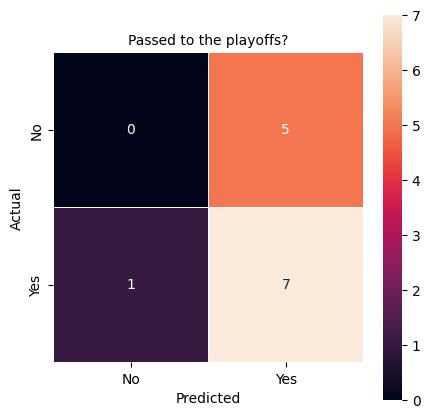

[('SAC', 0.9999999984735677), ('SEA', 0.9999999966180142), ('SAS', 0.9999999896884809), ('LAS', 0.9999766129212673), ('MIN', 0.6218012932022108), ('PHO', 0.230293554450306)]
[('CON', 0.9999999998308249), ('NYL', 0.9999999928317163), ('WAS', 0.9999999860289415), ('CHI', 0.9999996927730095), ('ATL', 0.9999921387816266), ('DET', 0.9989311847258612), ('IND', 0.9978291792861638)]


In [19]:
# logistic regression
from sklearn.metrics import confusion_matrix

logreg = LogisticRegression(max_iter=1000)
logreg.fit(train_inputs,train_labels)

y_pred = logreg.predict(test_inputs)

print(train_inputs)
print(test_inputs)


#print metrics
print("Accuracy:",metrics.accuracy_score(test_labels,y_pred))
print("Precision:",metrics.precision_score(test_labels, y_pred, pos_label="Y"))
print("Recall:",metrics.recall_score(test_labels, y_pred, pos_label="Y"))
print("F1:",metrics.f1_score(test_labels, y_pred, pos_label="Y"))

# confusion matrix
confusion = confusion_matrix(test_labels, y_pred)
print(f"Confusion matrix:\n{confusion}")

#plot confusion matrix
plt.figure(figsize=(5,5))
sb.heatmap(confusion, annot=True, fmt="g", linewidths=.5, square = True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Passed to the playoffs?'
plt.title(all_sample_title, size = 10)
plt.show()

query = "select tmId, confID from teams where year = 10;"
teams_conf_ids = pd.read_sql(query, connection)

query = "select tmID from teams where year = 10;"

# print(teams_conf_ids)

west_teams = teams_conf_ids[teams_conf_ids["confID"] == "WE"]
east_teams = teams_conf_ids[teams_conf_ids["confID"] == "EA"]

# print(west_teams)
# print(east_teams)

# print the probabilities for each class
probs = logreg.predict_proba(test_inputs)
probs_west = []
probs_east = []

for i in range(len(probs)):
    team_id = team_ids[i]
    
    if team_id in west_teams["tmID"].values:
        probs_west.append((team_id, probs[i][1]))
        
    if team_id in east_teams["tmID"].values:
        probs_east.append((team_id, probs[i][1]))
    
    # print(f"{team_name[0]}: {probs[i][1]}")

probs_west = sorted(probs_west, key=lambda x: x[1], reverse=True)
probs_east = sorted(probs_east, key=lambda x: x[1], reverse=True)

print(probs_west)
print(probs_east)

### Neural Network

C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.6923076923076923
Precision: 0.6666666666666666
Recall: 1.0
F1: 0.8
Confusion matrix:
[[1 4]
 [0 8]]


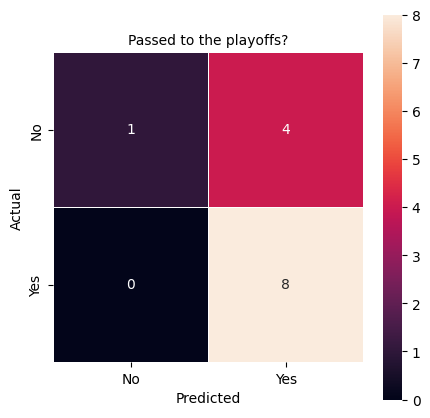

[('SAS', 0.9999999910551177), ('SEA', 0.9999999800127457), ('LAS', 0.9999999363479941), ('SAC', 0.9999988351296571), ('PHO', 0.9999447043577094), ('MIN', 0.0001397399797721378)]
[('ATL', 0.9999999999715292), ('CHI', 0.9999999999621605), ('WAS', 0.9999999999468285), ('CON', 0.9999999999428797), ('NYL', 0.9999999887525283), ('DET', 0.9999305416005602), ('IND', 0.9966958632400115)]


In [20]:
# neural network

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000, alpha=0.0001, solver='adam', verbose=0, random_state=21, tol=0.000000001)
mlp.fit(train_inputs,train_labels)

y_pred = mlp.predict(test_inputs)
#print metrics
print("Accuracy:",metrics.accuracy_score(test_labels,y_pred))
print("Precision:",metrics.precision_score(test_labels, y_pred, pos_label="Y"))

print("Recall:",metrics.recall_score(test_labels, y_pred, pos_label="Y"))
print("F1:",metrics.f1_score(test_labels, y_pred, pos_label="Y"))

# confusion matrix
confusion = confusion_matrix(test_labels, y_pred)
print(f"Confusion matrix:\n{confusion}")

#plot confusion matrix
plt.figure(figsize=(5,5))
sb.heatmap(confusion, annot=True, fmt="g", linewidths=.5, square = True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Passed to the playoffs?'
plt.title(all_sample_title, size = 10)
plt.show()

# print the probabilities for each class
probs = mlp.predict_proba(test_inputs)
probs_west = []
probs_east = []

for i in range(len(probs)):
    team_id = team_ids[i]
    
    if team_id in west_teams["tmID"].values:
        probs_west.append((team_id, probs[i][1]))
        
    if team_id in east_teams["tmID"].values:
        probs_east.append((team_id, probs[i][1]))
    
    # print(f"{team_name[0]}: {probs[i][1]}")
    
probs_west = sorted(probs_west, key=lambda x: x[1], reverse=True)
probs_east = sorted(probs_east, key=lambda x: x[1], reverse=True)

print(probs_west)
print(probs_east)

### Support Vector Machine (SVM)

C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.6153846153846154
Precision: 0.6363636363636364
Recall: 0.875
F1: 0.7368421052631579
Confusion matrix:
[[1 4]
 [1 7]]


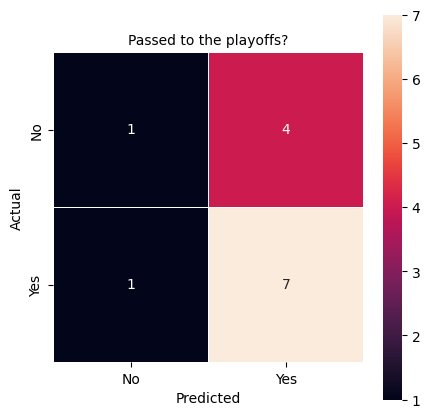

[('SAC', 0.9999999930937049), ('SEA', 0.9999999664661023), ('SAS', 0.999999846018709), ('LAS', 0.9957499565695506), ('MIN', 0.4416523791040581), ('PHO', 0.3769091958832154)]
[('CON', 0.9999999997212137), ('NYL', 0.9999999966222453), ('WAS', 0.9999999283226505), ('CHI', 0.9999995494875353), ('ATL', 0.9969007418146971), ('DET', 0.9399862771775616), ('IND', 0.9223341294511608)]


In [21]:
# SVM

from sklearn import svm

clf = svm.SVC(kernel='linear', C=1, probability=True)
clf.fit(train_inputs,train_labels)

y_pred = clf.predict(test_inputs)

#print metrics
print("Accuracy:",metrics.accuracy_score(test_labels,y_pred))
print("Precision:",metrics.precision_score(test_labels, y_pred, pos_label="Y"))
print("Recall:",metrics.recall_score(test_labels, y_pred, pos_label="Y"))
print("F1:",metrics.f1_score(test_labels, y_pred, pos_label="Y"))

# confusion matrix
confusion = confusion_matrix(test_labels, y_pred)
print(f"Confusion matrix:\n{confusion}")

#plot confusion matrix
plt.figure(figsize=(5,5))
sb.heatmap(confusion, annot=True, fmt="g", linewidths=.5, square = True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Passed to the playoffs?'

plt.title(all_sample_title, size = 10)
plt.show()

# print the probabilities for each class
probs = clf.predict_proba(test_inputs)
probs_west = []
probs_east = []

for i in range(len(probs)):
    
    team_id = team_ids[i]
    
    if team_id in west_teams["tmID"].values:
        probs_west.append((team_id, probs[i][1]))
        
    if team_id in east_teams["tmID"].values:
        probs_east.append((team_id, probs[i][1]))
    
    # print(f"{team_name[0]}: {probs[i][1]}")
    
probs_west = sorted(probs_west, key=lambda x: x[1], reverse=True)
probs_east = sorted(probs_east, key=lambda x: x[1], reverse=True)

print(probs_west)
print(probs_east)

### K-Nearest Neighbour

C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.5384615384615384
Precision: 0.5833333333333334
Recall: 0.875
F1: 0.7000000000000001
Confusion matrix:
[[0 5]
 [1 7]]


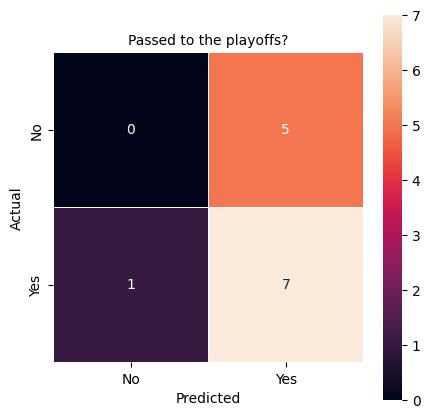

[('SEA', 0.7916666666666666), ('SAC', 0.75), ('SAS', 0.75), ('MIN', 0.625), ('LAS', 0.5833333333333334), ('PHO', 0.5833333333333334)]
[('CON', 0.8333333333333334), ('WAS', 0.75), ('DET', 0.625), ('NYL', 0.625), ('CHI', 0.5833333333333334), ('IND', 0.5833333333333334), ('ATL', 0.5)]


In [22]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(train_inputs,train_labels)

y_pred = knn.predict(test_inputs)

#print metrics
print("Accuracy:",metrics.accuracy_score(test_labels,y_pred))
print("Precision:",metrics.precision_score(test_labels, y_pred, pos_label="Y"))
print("Recall:",metrics.recall_score(test_labels, y_pred, pos_label="Y"))
print("F1:",metrics.f1_score(test_labels, y_pred, pos_label="Y"))

# confusion matrix
confusion = confusion_matrix(test_labels, y_pred)
print(f"Confusion matrix:\n{confusion}")

#plot confusion matrix
plt.figure(figsize=(5,5))
sb.heatmap(confusion, annot=True, fmt="g", linewidths=.5, square = True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Passed to the playoffs?'

plt.title(all_sample_title, size = 10)
plt.show()

# print the probabilities for each class
probs = knn.predict_proba(test_inputs)
probs_west = []
probs_east = []

for i in range(len(probs)):
    
    team_id = team_ids[i]
    
    if team_id in west_teams["tmID"].values:
        probs_west.append((team_id, probs[i][1]))
        
    if team_id in east_teams["tmID"].values:
        probs_east.append((team_id, probs[i][1]))
    
    # print(f"{team_name[0]}: {probs[i][1]}")
    
probs_west = sorted(probs_west, key=lambda x: x[1], reverse=True)
probs_east = sorted(probs_east, key=lambda x: x[1], reverse=True)

print(probs_west)
print(probs_east)

### Decision Tree Classifier

Accuracy: 0.38461538461538464
Precision: 0.5
Recall: 0.5
F1: 0.5
Confusion matrix:
[[1 4]
 [4 4]]


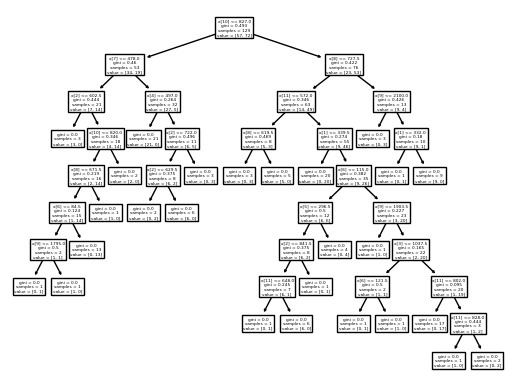

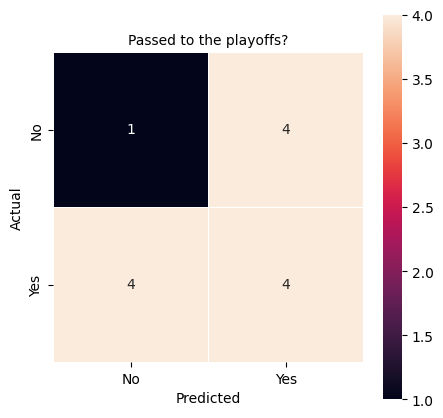

In [23]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(train_inputs,train_labels)

#print decision tree
tree.plot_tree(dt)
columns = ['bioID', 'pos', 'height', 'weight', 'college', 'collegeOther',
       'birthDate', 'year', 'stint', 'tmID', 'points', 'oRebounds', 'dRebounds', 'rebounds',
       'assists', 'steals', 'blocks', 'turnovers', 'PF', 'fgAttempted',
       'fgMade', 'ftAttempted', 'ftMade', 'threeAttempted', 'threeMade']

y_pred = dt.predict(test_inputs)

#print metrics
print("Accuracy:",metrics.accuracy_score(test_labels,y_pred))
print("Precision:",metrics.precision_score(test_labels, y_pred, pos_label="Y"))
print("Recall:",metrics.recall_score(test_labels, y_pred, pos_label="Y"))
print("F1:",metrics.f1_score(test_labels, y_pred, pos_label="Y"))

# confusion matrix
confusion = confusion_matrix(test_labels, y_pred)
print(f"Confusion matrix:\n{confusion}")

#plot confusion matrix
plt.figure(figsize=(5,5))
sb.heatmap(confusion, annot=True, fmt="g", linewidths=.5, square = True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Passed to the playoffs?'

plt.title(all_sample_title, size = 10)
plt.show()

# print the probabilities for each class
probs = dt.predict_proba(test_inputs)
probs_west = []
probs_east = []

for i in range(len(probs)):
        
        team_id = team_ids[i]
        
        if team_id in west_teams["tmID"].values:
            probs_west.append((team_id, probs[i][1]))
            
        if team_id in east_teams["tmID"].values:
            probs_east.append((team_id, probs[i][1]))
        
        # print(f"{team_name[0]}: {probs[i][1]}")
        
probs_west = sorted(probs_west, key=lambda x: x[1], reverse=True)
probs_east = sorted(probs_east, key=lambda x: x[1], reverse=True)

From the graphics and values from above, it’s easy to conclude that there wasn’t much of an increase in the quality in the results, as the accuracy and precision values are similar or lower, when compared to previous models. 

This is most likely due to the fact that we are predicting each player’s perfomance. This task not only is inherently complex, leading to poor results, but also it’s important to note that a perfomance of a player, from one year to another, can be affected by various external factors, which we can’t take into consideration.

# 4th try - The best model

Considering the data context we decided to develop a more complex model that considers teams as a set of players and coach.
Our goal is to make the final prediction based in the expected players performance according to their recorded statistics in the previous years. 

**NOTE:** For this model, it's necessary to recreate the database

In [7]:
connection.close()

Now delete the `database/final.db` file and run 
```sh 
cat database/final.sql | sqlite3 database/final.db
``` 
in the command line.

In [8]:
connection = sqlite3.connect("./database/final.db")

In [14]:
## create an empty dataframe without any column names, indices or data
df = pd.DataFrame()

## obtain the team IDS and year
team_ids = pd.read_sql("select tmID, year, confID from teams order by tmID", connection)

## iterate through each team and year
for index, row in team_ids.iterrows():

    ## obtain the team ID and year for each row
    team_id = row['tmID']
    year = row['year']
    confID = row['confID']

    # get all players from the team and year
    query = "select tmID, year, playerID from players_teams where tmID = '" + team_id + "' and year = " + str(year) + ";"

    ## obtain the players for each team
    team_players = pd.read_sql(query, connection)
    # points, oRebounds, dRebounds, rebounds, assists, steals, blocks, turnovers, PF, fgAttempted, fgMade, ftAttempted, ftMade, threeAttempted, threeMade
    team_stats = {"year": year, "points": 0, "oRebounds": 0, "dRebounds": 0, "rebounds": 0,
                  "assists": 0, "steals": 0, "blocks": 0, "turnovers": 0, "PF": 0, "fgAttempted": 0,
                  "fgMade": 0, "ftAttempted": 0, "ftMade": 0, "threeAttempted": 0, "threeMade": 0,
                  'weight': 0, "height": 0, "player_awards": 0, "confID": confID, "num_playoffs": 0,
                  "num_semis": 0, "num_finals": 0, "coach_win_ratio": 0, "coach_stint": 0,
                  "playoff": 0}

    # iterate through each player
    for idx, r in team_players.iterrows():
        ## obtain the player ID for each row
        player_id = r['playerID']

        # get the player's position
        query = "select pos from players where bioID = '" + player_id + "';"
        pos = pd.read_sql(query, connection).values[0][0]

        # get number of years played
        query = "select count(distinct year) as num_years from players_teams where playerID = '" + player_id + "' and year < " + str(year) + ";"
        num_years = pd.read_sql(query, connection).values[0][0]

        if num_years == 0:
            query = "select avg(points) as points, avg(oRebounds) as oRebounds, avg(dRebounds) as dRebounds, avg(rebounds) as rebounds, avg(assists) as assists, \
                avg(steals) as steals, avg(blocks) as blocks, avg(turnovers) as turnovers, avg(PF) as PF, avg(fgAttempted) as fgAttempted, \
                avg(fgMade) as fgMade, avg(ftAttempted) as ftAttempted, avg(ftMade) as ftMade, avg(threeAttempted) as threeAttempted, avg(threeMade) as threeMade \
                from players_teams join players on players_teams.playerID = players.bioID where year = " + str(year - 1) + " \
                and pos = '" + pos + "' and playerID not in (select playerID from players_teams where year < " + str(year - 1) + ");"
            player_stats = pd.read_sql(query, connection)

            ## add the player stats to the team stats
            team_stats['points'] += (player_stats['points'].values[0] or 0 )
            team_stats['oRebounds'] += (player_stats['oRebounds'].values[0] or 0 )
            team_stats['dRebounds'] += (player_stats['dRebounds'].values[0] or 0 )
            team_stats['rebounds'] += (player_stats['rebounds'].values[0] or 0 )
            team_stats['assists'] += (player_stats['assists'].values[0] or 0 )
            team_stats['steals'] += (player_stats['steals'].values[0] or 0 )
            team_stats['blocks'] += (player_stats['blocks'].values[0] or 0 )
            team_stats['turnovers'] += (player_stats['turnovers'].values[0] or 0 )
            team_stats['PF'] += (player_stats['PF'].values[0] or 0 )
            team_stats['fgAttempted'] += (player_stats['fgAttempted'].values[0] or 0 )
            team_stats['fgMade'] += (player_stats['fgMade'].values[0] or 0 )
            team_stats['ftAttempted'] += (player_stats['ftAttempted'].values[0] or 0 )
            team_stats['ftMade'] += (player_stats['ftMade'].values[0] or 0 )
            team_stats['threeAttempted'] += (player_stats['threeAttempted'].values[0] or 0 )
            team_stats['threeMade'] += (player_stats['threeMade'].values[0] or 0 )
            
        else:

            query = "select year, points, oRebounds, dRebounds, rebounds, assists, \
                    steals, blocks, turnovers, PF, fgAttempted, \
                    fgMade, ftAttempted, ftMade, threeAttempted, sum(threeMade) as threeMade \
                    from players_teams where playerID = '" + player_id + "' and year < " + str(year) + ";"
        
            ## obtain the average stats for each team
            player_stats = pd.read_sql(query, connection)

            points = oRebounds = dRebounds = rebounds = assists = steals = blocks = turnovers = PF = fgAttempted = fgMade = ftAttempted = ftMade = threeAttempted = threeMade = 0
            sum_weight = 0
            # iterate player stats and make weighted average for each year
            for j, row2 in player_stats.iterrows():

                iteration_year = row2['year']

                weight = 1 / (year - iteration_year)

                sum_weight += weight

                points += row2['points'] * weight
                oRebounds += row2['oRebounds'] * weight
                dRebounds += row2['dRebounds'] * weight
                rebounds += row2['rebounds'] * weight
                assists += row2['assists'] * weight
                steals += row2['steals'] * weight
                blocks += row2['blocks'] * weight
                turnovers += row2['turnovers'] * weight
                PF += row2['PF'] * weight
                fgAttempted += row2['fgAttempted'] * weight
                fgMade += row2['fgMade'] * weight
                ftAttempted += row2['ftAttempted'] * weight
                ftMade += row2['ftMade'] * weight
                threeAttempted += row2['threeAttempted'] * weight
                threeMade += row2['threeMade'] * weight

            # add the player stats to the team stats
            team_stats['points'] += points / sum_weight
            team_stats['oRebounds'] += oRebounds / sum_weight
            team_stats['dRebounds'] += dRebounds / sum_weight
            team_stats['rebounds'] += rebounds / sum_weight
            team_stats['assists'] += assists / sum_weight
            team_stats['steals'] += steals / sum_weight
            team_stats['blocks'] += blocks / sum_weight
            team_stats['turnovers'] += turnovers / sum_weight
            team_stats['PF'] += PF / sum_weight
            team_stats['fgAttempted'] += fgAttempted / sum_weight
            team_stats['fgMade'] += fgMade / sum_weight
            team_stats['ftAttempted'] += ftAttempted / sum_weight
            team_stats['ftMade'] += ftMade / sum_weight
            team_stats['threeAttempted'] += threeAttempted / sum_weight
            team_stats['threeMade'] += threeMade / sum_weight
        
        num_years = max(num_years, 1)


        # get each player num awards
        query = "select count(award) as num_awards_player from awards_players ap join players_teams pt on ap.year = pt.year \
                and ap.playerID = pt.playerID where ap.playerID = '" + player_id + "' and ap.year < " + str(year) + ";"
        num_awards_player = pd.read_sql(query, connection).values[0][0]
        team_stats['player_awards'] += num_awards_player

        # get the number of times the player went to the playoffs
        query = "select count(*) as num_playoffs from teams join players_teams on teams.year = players_teams.year and teams.tmID = players_teams.tmID\
            where playerID = '" + player_id + "' and teams.year < " + str(year) + " and firstRound <> '';"
        num_playoffs = pd.read_sql(query, connection).values[0][0]
        team_stats['num_playoffs'] += num_playoffs

        # get the number of times the player went to the semis
        query = "select count(*) as num_playoffs from teams join players_teams on teams.year = players_teams.year and teams.tmID = players_teams.tmID\
            where playerID = '" + player_id + "' and teams.year < " + str(year) + " and semis <> '';"
        num_semis = pd.read_sql(query, connection).values[0][0]
        team_stats['num_semis'] += num_semis

        # get the number of times the player went to the finals
        query = "select count(*) as num_playoffs from teams join players_teams on teams.year = players_teams.year and teams.tmID = players_teams.tmID\
            where playerID = '" + player_id + "' and teams.year < " + str(year) + " and finals <> '';"
        num_finals = pd.read_sql(query, connection).values[0][0]
        team_stats['num_finals'] += num_finals
    
    
    query = "select avg(weight), avg(height) from players_teams join players on players.bioID = players_teams.playerID \
        where tmID = '" + team_id + "' and year = " + str(year) + ";"
        
    ## obtain the average weight and height for each team
    team_weight_height = pd.read_sql(query, connection)
    
    ## add the average weight and height to the team stats
    team_stats['weight'] = team_weight_height['avg(weight)'].values[0]
    team_stats['height'] = team_weight_height['avg(height)'].values[0]

    # get team coach
    query = "select coachID, stint from coaches where tmID = '" + team_id + "' and year = "+ str(year) +";"
    coach_id = pd.read_sql(query, connection).values[0][0]
    stint = pd.read_sql(query, connection).values[0][1]
    team_stats['coach_stint'] = stint
    
    
    query = "select count(award) as num_awards from coaches join awards_players \
              on coaches.coachID = awards_players.playerID and coaches.year = awards_players.year \
              where coachID = '" + coach_id + "' and coaches.year < " + str(year) + ";"
    coach_awards = pd.read_sql(query, connection).values[0][0]
    team_stats['coach_awards'] = coach_awards

    # get average wins and losses from coach
    query = "select avg(won), avg(lost) from coaches where coachID = '" + coach_id + "' and year < " + str(year) + ";"
    coach_wins_losses = pd.read_sql(query, connection)
    num_matches_coach = (coach_wins_losses['avg(won)'].values[0] or 0) + (coach_wins_losses['avg(lost)'].values[0] or 0)
    if num_matches_coach == 0:
        team_stats['coach_win_ratio'] = 0
    else:
        team_stats['coach_win_ratio'] = (coach_wins_losses['avg(won)'].values[0] or 0) / num_matches_coach
        
        
    query = "select playoff from teams where tmID = '" + team_id + "' and year = " + str(year) + ";"
    playoff = pd.read_sql(query, connection)
    
    # check if it's Y or N
    if playoff['playoff'][0] == 'Y':
        team_stats['playoff'] = 1
    else:
        team_stats['playoff'] = 0
        
    
    # append the stats to the dataframe
    df = df._append(team_stats, ignore_index=True)


There is a entry for each team for each year. For each of this entries a team is represented by:
 - the sum of their players yearly statistics weighted average 
 - the average weight and height
 - the sum of players awards
 - the sum of the number of times the players reached playoffs, semis and finals
 - coach win ratio
 - conference the team belongs to

In [15]:
categorical_columns = ["confID"]
for col in categorical_columns:
    df[col] = df[col].astype('category')

df= pd.get_dummies(df, columns=categorical_columns)

To train the model, like the previous models, we need to split the data into training and testing sets. According to the context of the project, once again the division that makes sense is by years.

In [16]:
target_year = 11

# # get all rows from df where year = target year
test_data = df.loc[df["year"] == target_year]

# # get all rows from df where year <> target_year and year <> 1
train_data = df.loc[df["year"] < target_year]
train_data = train_data.loc[train_data["year"] != 1]

labels = ['playoff']

inputs = []

for col in df.columns:
    if col not in labels:
        inputs.append(col)

train_inputs = train_data[inputs].values
train_labels = train_data[labels].values

test_inputs = test_data[inputs].values
test_labels = test_data[labels].values


Considering the features are in different scales it is a good practice to standardize it into a range from 0 to 1. This can be achieved using the MinMaxScaler.

In [17]:
# min max scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_inputs)

train_inputs = scaler.transform(train_inputs)
test_inputs = scaler.transform(test_inputs)

Now that everything is set we can start applying the algorithms.

### Logistic Regression

In [18]:
# logistic regression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(train_inputs,train_labels)

y_pred = logreg.predict(test_inputs)

C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Like the other models, in the testing phase it is useful to gather some metrics relative to the way it is working and the quality of its predictions.

With this in mind we considered relevant metrics:
 - Accuracy
 - Precision
 - Recall
 - F1
 - Confusion Matrix
 - ROC
 - AUC

(Note: this will only work when testing the model, so the target year variable should be set to 10. When the target year is 11 then there will be no test labels to compare with the predictions.)

Accuracy: 0.8461538461538461
Precision: 0.875
Recall: 0.875
F1: 0.875
Confusion matrix:
[[4 1]
 [1 7]]


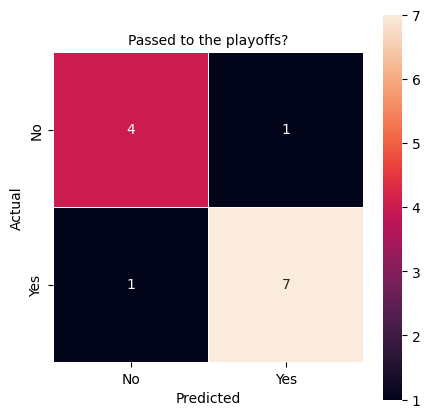

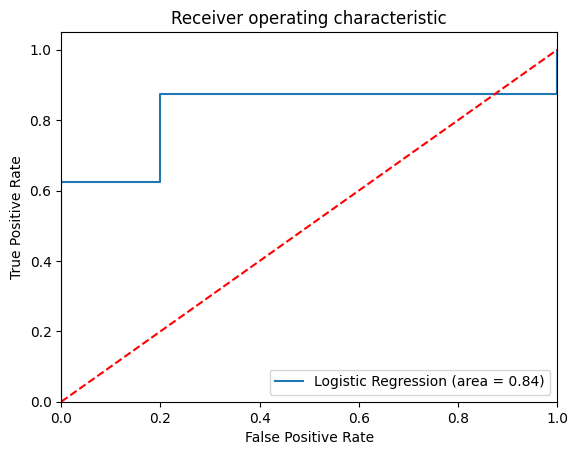

In [13]:
#print metrics
print("Accuracy:",metrics.accuracy_score(test_labels,y_pred))
print("Precision:",metrics.precision_score(test_labels, y_pred))
print("Recall:",metrics.recall_score(test_labels, y_pred))
print("F1:",metrics.f1_score(test_labels, y_pred))

feature_importance = abs(logreg.coef_[0])
feature_importance = sorted(zip(inputs, feature_importance), key=lambda x: x[1], reverse=True)

# print("Feature importance:")
# for i in range(len(feature_importance)):
#     print(f"{feature_importance[i][0]}: {feature_importance[i][1]}")

# confusion matrix
confusion = confusion_matrix(test_labels, y_pred)
print(f"Confusion matrix:\n{confusion}")

#plot confusion matrix
plt.figure(figsize=(5,5))
sb.heatmap(confusion, annot=True, fmt="g", linewidths=.5, square = True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Passed to the playoffs?'
plt.title(all_sample_title, size = 10)
plt.show()

# roc curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(test_labels, logreg.predict(test_inputs))
fpr, tpr, thresholds = roc_curve(test_labels, logreg.predict_proba(test_inputs)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Since the algorithm does not know that only 4 teams from each conference qualify to the playoffs we need to enforce this knowledge in our predictions. So, we divide the teams by conference, and consider that they qualify if they are one of the 4 most likely to, even if the probability is below 0.5.

In [19]:
query = "select tmId, confID from teams where year = " + str(target_year) + ";"
teams_conf_ids = pd.read_sql(query, connection)

query = "select tmID from teams where year = " + str(target_year) + ";"

# print(teams_conf_ids)

west_teams = teams_conf_ids[teams_conf_ids["confID"] == "WE"]
east_teams = teams_conf_ids[teams_conf_ids["confID"] == "EA"]

# print(west_teams)
# print(east_teams)

# print the probabilities for each class
probs = logreg.predict_proba(test_inputs)
probs_west = []
probs_east = []

query = "select tmID from teams where year = " + str(target_year) + ";"
team_ids = pd.read_sql(query, connection)
team_ids = team_ids["tmID"].values

for i in range(len(probs)):
    team_id = team_ids[i]
    
    if team_id in west_teams["tmID"].values:
        probs_west.append((team_id, probs[i][1]))
        
    if team_id in east_teams["tmID"].values:
        probs_east.append((team_id, probs[i][1]))
    
    # print(f"{team_name[0]}: {probs[i][1]}")

probs_west = sorted(probs_west, key=lambda x: x[1], reverse=True)
probs_east = sorted(probs_east, key=lambda x: x[1], reverse=True)

print(probs_west)
print(probs_east)

[('LAS', 0.820996762089793), ('SEA', 0.7511376741989788), ('PHO', 0.7144901621898443), ('SAS', 0.6819515943269425), ('TUL', 0.45563557000462496), ('MIN', 0.35309093676718206)]
[('IND', 0.8115858968623337), ('CON', 0.6523625757512757), ('NYL', 0.6414950725978064), ('ATL', 0.5105920160009322), ('WAS', 0.5033855036290906), ('CHI', 0.38849319065541676)]


Finally we have the logistic regression predictions.

Now we can train and predict using different algorithms.

### Neural Network

In [8]:
# neural network

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=2000, alpha=0.0001, solver='adam', verbose=0, random_state=21, tol=0.000000001)
mlp.fit(train_inputs,train_labels)

y_pred = mlp.predict(test_inputs)

C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.6153846153846154
Precision: 0.6153846153846154
Recall: 1.0
F1: 0.761904761904762
Confusion matrix:
[[0 5]
 [0 8]]


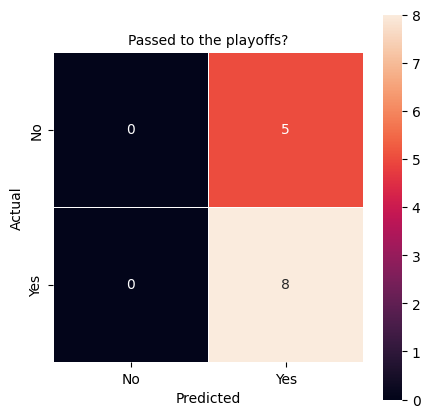

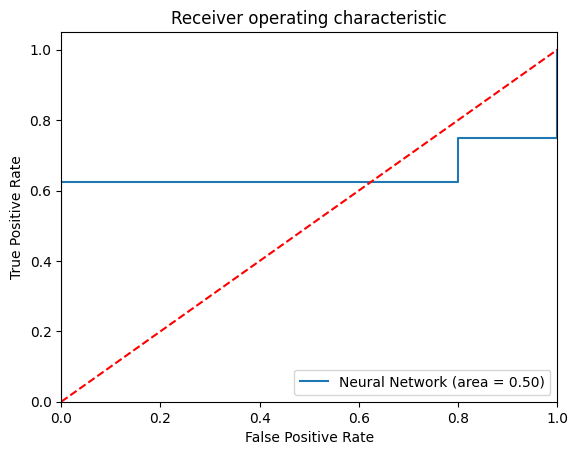

In [9]:
#print metrics
print("Accuracy:",metrics.accuracy_score(test_labels,y_pred))
print("Precision:",metrics.precision_score(test_labels, y_pred))

print("Recall:",metrics.recall_score(test_labels, y_pred))
print("F1:",metrics.f1_score(test_labels, y_pred))

# confusion matrix
confusion = confusion_matrix(test_labels, y_pred)
print(f"Confusion matrix:\n{confusion}")

#plot confusion matrix
plt.figure(figsize=(5,5))
sb.heatmap(confusion, annot=True, fmt="g", linewidths=.5, square = True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Passed to the playoffs?'
plt.title(all_sample_title, size = 10)
plt.show()

# roc curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

neural_net_roc_auc = roc_auc_score(test_labels, mlp.predict(test_inputs))
fpr, tpr, thresholds = roc_curve(test_labels, mlp.predict_proba(test_inputs)[:,1])
plt.figure()

plt.plot(fpr, tpr, label='Neural Network (area = %0.2f)' % neural_net_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [33]:
# print the probabilities for each class
probs = mlp.predict_proba(test_inputs)
probs_west = []
probs_east = []

for i in range(len(probs)):
    team_id = team_ids[i]
    
    if team_id in west_teams["tmID"].values:
        probs_west.append((team_id, probs[i][1]))
        
    if team_id in east_teams["tmID"].values:
        probs_east.append((team_id, probs[i][1]))
    
    # print(f"{team_name[0]}: {probs[i][1]}")
    
probs_west = sorted(probs_west, key=lambda x: x[1], reverse=True)
probs_east = sorted(probs_east, key=lambda x: x[1], reverse=True)

print(probs_west)
print(probs_east)

[('LAS', 1.0), ('SAS', 0.9999999999916693), ('PHO', 0.9999987490474186), ('SAC', 0.091105749207371), ('SEA', 2.5771112227638696e-05), ('MIN', 7.064893616986177e-13)]
[('DET', 0.9999999998453608), ('CHI', 0.9999953254206099), ('IND', 0.9328745086863854), ('ATL', 0.20179506245785583), ('NYL', 0.00010718367502833058), ('CON', 1.5570098050430707e-09), ('WAS', 4.69717152820289e-10)]


### K-Nearest Neighbours

C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.8461538461538461
Precision: 0.8
Recall: 1.0
F1: 0.888888888888889
Confusion matrix:
[[3 2]
 [0 8]]


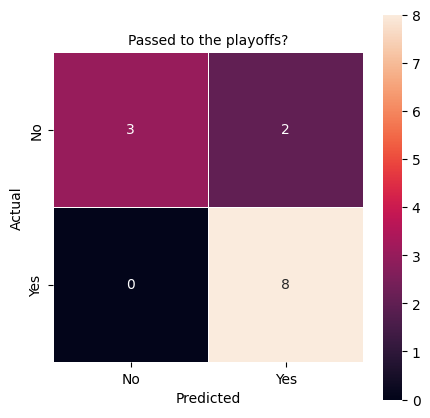

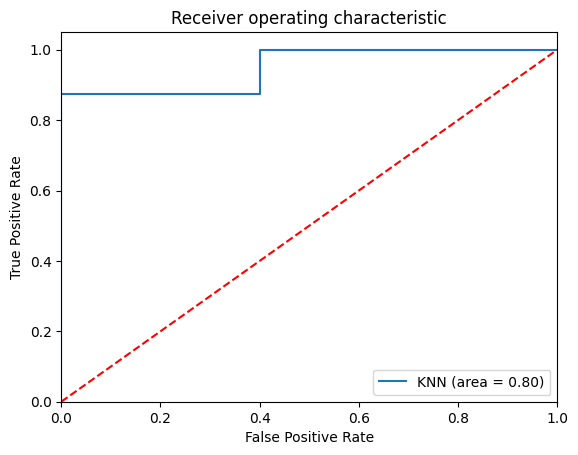

[('SAS', 0.875682452571514), ('LAS', 0.8727511386035935), ('SEA', 0.7066114724764765), ('PHO', 0.6340434972832442), ('SAC', 0.60158839234137), ('MIN', 0.394756783993774)]
[('DET', 0.8773718610590382), ('IND', 0.704560110646041), ('ATL', 0.6994937249992724), ('CHI', 0.5290362710932887), ('WAS', 0.5026496678373381), ('NYL', 0.49285524876580633), ('CON', 0.45400355076703997)]


In [10]:
#standardize data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_inputs)

train_inputs = scaler.transform(train_inputs)
test_inputs = scaler.transform(test_inputs)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7, weights='distance')
knn.fit(train_inputs,train_labels)

y_pred = knn.predict(test_inputs)

#print metrics
print("Accuracy:",metrics.accuracy_score(test_labels,y_pred))
print("Precision:",metrics.precision_score(test_labels, y_pred))
print("Recall:",metrics.recall_score(test_labels, y_pred))
print("F1:",metrics.f1_score(test_labels, y_pred))

# confusion matrix
confusion = confusion_matrix(test_labels, y_pred)
print(f"Confusion matrix:\n{confusion}")

#plot confusion matrix
plt.figure(figsize=(5,5))
sb.heatmap(confusion, annot=True, fmt="g", linewidths=.5, square = True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Passed to the playoffs?'

plt.title(all_sample_title, size = 10)
plt.show()

# roc curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

knn_roc_auc = roc_auc_score(test_labels, knn.predict(test_inputs))  
fpr, tpr, thresholds = roc_curve(test_labels, knn.predict_proba(test_inputs)[:,1])
plt.figure()

plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# print the probabilities for each class
probs = knn.predict_proba(test_inputs)
probs_west = []
probs_east = []

for i in range(len(probs)):
    
    team_id = team_ids[i]
    
    if team_id in west_teams["tmID"].values:
        probs_west.append((team_id, probs[i][1]))
        
    if team_id in east_teams["tmID"].values:
        probs_east.append((team_id, probs[i][1]))
    
    # print(f"{team_name[0]}: {probs[i][1]}")
    
probs_west = sorted(probs_west, key=lambda x: x[1], reverse=True)
probs_east = sorted(probs_east, key=lambda x: x[1], reverse=True)

print(probs_west)
print(probs_east)

### Support Vector Machines (SVM)

Accuracy: 0.7692307692307693
Precision: 0.7777777777777778
Recall: 0.875
F1: 0.823529411764706
Confusion matrix:
[[3 2]
 [1 7]]


C:\Users\Utilizador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


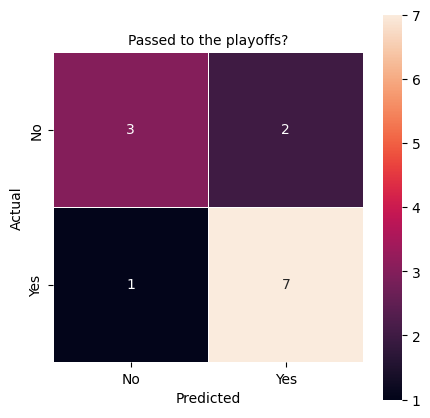

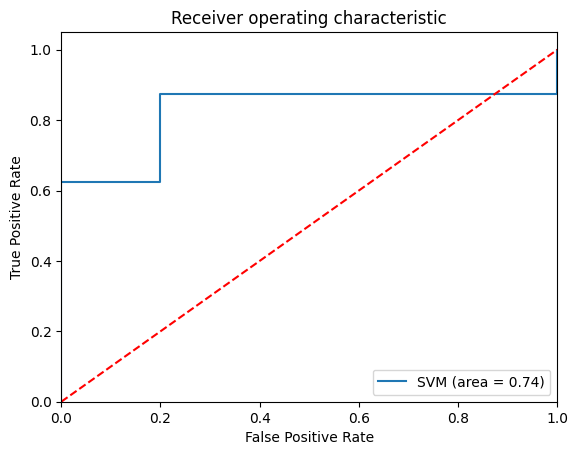

[('LAS', 0.9735898917265974), ('PHO', 0.8096213238256212), ('SAS', 0.758519754523626), ('SEA', 0.6157042513472275), ('SAC', 0.4206304122175847), ('MIN', 0.253977312385302)]
[('DET', 0.7803354201026562), ('IND', 0.7630442406424914), ('CHI', 0.6368683808481204), ('ATL', 0.6095712081505366), ('NYL', 0.5584027920606954), ('CON', 0.3729001858897333), ('WAS', 0.2430386983676432)]


In [11]:
# SVM

from sklearn import svm

clf = svm.SVC(kernel='linear', C=1, probability=True)
clf.fit(train_inputs,train_labels)

y_pred = clf.predict(test_inputs)

#print metrics
print("Accuracy:",metrics.accuracy_score(test_labels,y_pred))
print("Precision:",metrics.precision_score(test_labels, y_pred))
print("Recall:",metrics.recall_score(test_labels, y_pred))
print("F1:",metrics.f1_score(test_labels, y_pred))

# confusion matrix
confusion = confusion_matrix(test_labels, y_pred)
print(f"Confusion matrix:\n{confusion}")

#plot confusion matrix
plt.figure(figsize=(5,5))
sb.heatmap(confusion, annot=True, fmt="g", linewidths=.5, square = True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Passed to the playoffs?'

plt.title(all_sample_title, size = 10)
plt.show()

# roc curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

svm_roc_auc = roc_auc_score(test_labels, clf.predict(test_inputs))
fpr, tpr, thresholds = roc_curve(test_labels, clf.predict_proba(test_inputs)[:,1])
plt.figure()

plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % svm_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# print the probabilities for each class
probs = clf.predict_proba(test_inputs)
probs_west = []
probs_east = []

for i in range(len(probs)):
        
        team_id = team_ids[i]
        
        if team_id in west_teams["tmID"].values:
            probs_west.append((team_id, probs[i][1]))
            
        if team_id in east_teams["tmID"].values:
            probs_east.append((team_id, probs[i][1]))
        
        # print(f"{team_name[0]}: {probs[i][1]}")
        
probs_west = sorted(probs_west, key=lambda x: x[1], reverse=True)
probs_east = sorted(probs_east, key=lambda x: x[1], reverse=True)

print(probs_west)
print(probs_east)